# Toxic Comment Classification
>Access dataset from [here](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv('Data.csv')

In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


**This is a problem of multi-label classification many times people confuse in multi-label and multi-class.**
* The main difference between the two is lying in the concept of being mutually exclusive
* **Multi-class classifications** problems are those where each sample belongs to atmost one class only. Eg: In a coin toss the result can either be a heads or tails
* Whereas in case of **Multi-label classifications** each sample may belong to more than one class. Eg: A news article may belong to sports as well as politics.

In [5]:
#creating a new column by summing all the target columns
al=train[train.columns[2:]].sum(axis=1)

In [6]:
info=[]
y=train.shape[0]
info.append(['with no label',len(al[al==0]),(len(al[al==0])/y)*100])
for i in train.columns[2:]:
    x=len(train[train[i]==1][i])
    info.append([i,x,(x/y)*100])

In [7]:
#Created a dataframe that shows the count and percentage of comments in different categories of target column
pd.DataFrame(info,columns=['Comment type','Count','%'])

,Comment type,Count,%
0,with no label,143346,89.832112
1,toxic,15294,9.584448
2,severe_toxic,1595,0.999555
3,obscene,8449,5.294822
4,threat,478,0.299553
5,insult,7877,4.936361
6,identity_hate,1405,0.880486


In [8]:
#Getting the count for comments that belong to multiple categories in target columns
multi=al.value_counts()[1:]
multi

1    6360
3    4209
2    3480
4    1760
5     385
6      31
dtype: int64

Text(0.5, 1.0, 'Indivisual comments that belong to multiple classes')

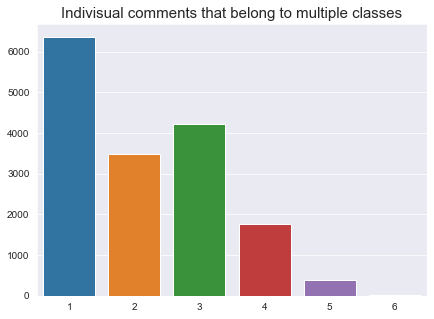

In [9]:
plt.figure(figsize=(7,5))
sns.barplot(x=multi.index,y=multi)
plt.title('Indivisual comments that belong to multiple classes',fontsize=15)

In [10]:
#creating a copy of dataframe
df=train.copy()

**Calculating word count**

In [11]:
#you might need to first install this library
import textstat

In [12]:
#using textstat.lexicon_count to grab the no of words in each comment
df['word_count']=[textstat.lexicon_count(i,removepunct=True) for i in df['comment_text'].values]

In [13]:
for i in train.columns[2:]:
    print(df[['word_count',i]].groupby(i).mean())
    print('-----------------------------------')

       word_count
toxic            
0       67.907095
1       50.708317
-----------------------------------
              word_count
severe_toxic            
0              66.168317
1              75.209404
-----------------------------------
         word_count
obscene            
0         67.217956
1         49.100840
-----------------------------------
        word_count
threat            
0        66.292722
1        54.930962
-----------------------------------
        word_count
insult            
0        67.214412
1        47.853498
-----------------------------------
               word_count
identity_hate            
0               66.388699
1               51.622776
-----------------------------------


It can be observed that except for severe_toxic all the comment belonging to non clean category have a lower average word count

**Symbols like "!*@#$*&" are also used when abusive words are used**

In [14]:
from nltk.tokenize import regexp_tokenize

In [15]:
df['sp_char']=[len(regexp_tokenize(i,"[!@#$&]")) for i in df['comment_text'].values]

In [16]:
for i in train.columns[2:]:
    print(df[['sp_char',i]].groupby(i).mean())
    print('-----------------------------------')

        sp_char
toxic          
0      0.447112
1      3.705113
-----------------------------------
                sp_char
severe_toxic           
0              0.600743
1             16.470846
-----------------------------------
          sp_char
obscene          
0        0.611248
1        3.408806
-----------------------------------
          sp_char
threat           
0        0.711012
1       16.855649
-----------------------------------
         sp_char
insult          
0       0.601164
1       3.806144
-----------------------------------
                sp_char
identity_hate          
0              0.744066
1              2.482562
-----------------------------------


It is clearly evident that there is a high probability that a comment with symbols like this !@#$& will be a non clean comment

**Calculating Unique word count**
* There are chances that abusive comments use words repeatively

In [17]:
from nltk.tokenize import word_tokenize

In [18]:
#using set to create a sequence of only unique words
df['unique_w_count']=[len(set(word_tokenize(i))) for i in df['comment_text'].values]

In [19]:
for i in train.columns[2:]:
    print(df[['unique_w_count',i]].groupby(i).mean())
    print('-----------------------------------')

       unique_w_count
toxic                
0           51.774392
1           33.802798
-----------------------------------
              unique_w_count
severe_toxic                
0                  50.322878
1                  23.214420
-----------------------------------
         unique_w_count
obscene                
0             51.105716
1             31.203219
-----------------------------------
        unique_w_count
threat                
0            50.113852
1            29.437238
-----------------------------------
        unique_w_count
insult                
0            51.067603
1            30.491939
-----------------------------------
               unique_w_count
identity_hate                
0                   50.223367
1                   30.750890
-----------------------------------


It is also clear that non clean comments use less unique words

# Lets explore through some of the comments

In [20]:
train.comment_text[5]

'"\n\nCongratulations from me as well, use the tools well. \xa0· talk "'

In [21]:
train.comment_text[1151]

'Back atcha\n\nAnd thanks to you too!  Cheers,  (talk)'

In [22]:
train.comment_text[8523]

'"\n\n Edit request for video games section \n\nThe section ICarly#Video games could use an update to the second paragraph to the effect that there has been a second game released by this publisher.  Something along the lines of \n\n""Activision released a sequel, iCarly 2: iJoin the Click, for the same platforms in November 2010.""\n\nor words to that effect should cover it.  If you need sources:\n\n IGN\n Gamers Hell\n\nThanks.  88.104.32.76  "'

# Text Cleaning
Most of the comments have **\n, punctuations, numbers, extra whitespaces, contractions and lots of stopwords**  lets remove that first 

In [23]:
import re
import spacy
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS
from textblob import TextBlob

Function for removing **\n**

In [24]:
def slash_n(text):
    #removing \n
    text=re.sub('\n',' ',text)
    #converting whole string into lowercase
    text=text.lower()
    return text

In [25]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

<font size ='4'>**Dealing with contractions**</font>
* A contraction is an abbreviation for a sequence of words
* eg: "you'll" is a contraction of "you will"

In [26]:
def contraction(text):
    """
    This function will return the text in  an expanded form which is in common English. It also helps in generalising the tokens
    """
    tokens=word_tokenize(text)
    tok=[]
    for i in tokens:
        if i in CONTRACTION_MAP.keys():
            tok.append(CONTRACTION_MAP[i])
        else:
            tok.append(i)
    return ' '.join(tok)

**Created a combined list of Stopwords taken form nltk corpus and spacy library**

In [27]:
#using stopwords from both libraries
nltk_sw=stopwords.words('english')
spacy_sw=list(STOP_WORDS)
#removing duplicates by converting list into set
stopword=list(set(nltk_sw+spacy_sw))

**Removing** Punctuations, Stopwords, Whitespaces and Non Alphabatics.

In [28]:
nlp=spacy.load('en_core_web_md')

In [29]:
def sw(text):
    text=textstat.remove_punctuation(text) #removing punctuations
    tokens=text.split()
    tok=[]
    for i in tokens:
        if i not in stopword:              #removing stopwords
            i=i.strip()                    #removing all leading and trailing whitespaces as they will create bais in next step
            if i.isalpha():                #removing non alphabatics
                tok.append(i)
    return ' '.join(tok)

<font size ='4'>**Performing Lemmatizatin**</font>
* We have used lemmatization instead of stemming because we are going to create vectors for each comment so we want the words in each comment to make some sense (whereas in case of stemming the word is broken to its stem length that may or may not make sense).
* Their are 2 methods for lemmatization using spacy's .lemma_ or WordNetLemmatizer
* For this problem we are using spacy's .lemma_ because its more afficient and advanced.

In [30]:
#Using Spacy's Lemmatization
def lemma(text):
    doc=nlp(text)
    tok=[i.lemma_ for i in doc]
    return ' '.join(tok)

**Applying all the functions**

In [31]:
train['comment_text']=train['comment_text'].apply(slash_n)

In [32]:
train['comment_text']=train['comment_text'].apply(contraction)

In [33]:
train['comment_text']=train['comment_text'].apply(sw)

In [34]:
train['comment_text']=train['comment_text'].apply(lemma) #takes 25 mins to process

# Generating Wordclouds for all categories

In [36]:
from wordcloud import WordCloud

In [37]:
def wordcloud_gen(i):
    texts=train[train[i]==1]['comment_text'].values
    wordcloud = WordCloud(background_color='black',width=700,height=500,colormap='viridis').generate(" ".join(texts))
    plt.figure(figsize=(7, 5))
    plt.imshow(wordcloud)
    plt.title(str(i).upper(),fontsize=15)
    plt.grid(False)
    plt.axis(False)

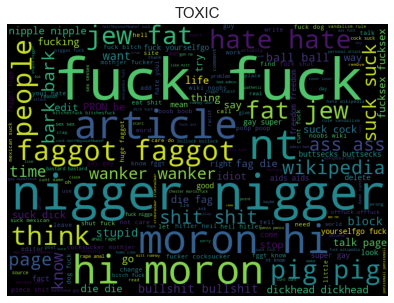

In [38]:
wordcloud_gen('toxic')

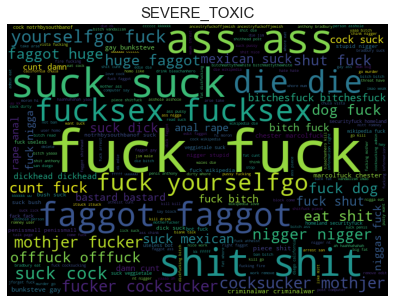

In [39]:
wordcloud_gen('severe_toxic')

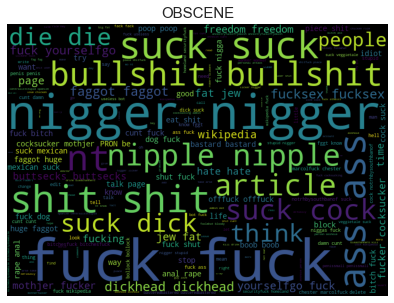

In [40]:
wordcloud_gen('obscene')

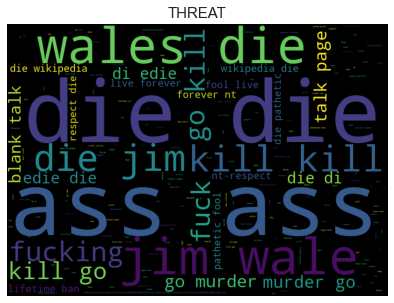

In [41]:
wordcloud_gen('threat')

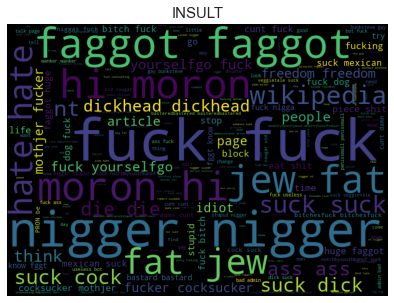

In [42]:
wordcloud_gen('insult')

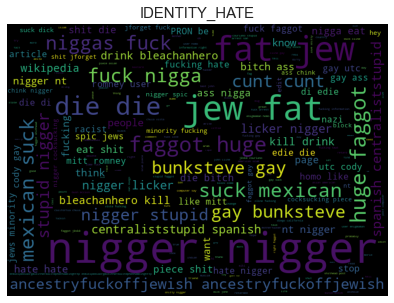

In [43]:
wordcloud_gen('identity_hate')

These wordclouds also indicate that an indivisual comment may belongs to multiple classes as there are many

(-0.5, 699.5, 499.5, -0.5)

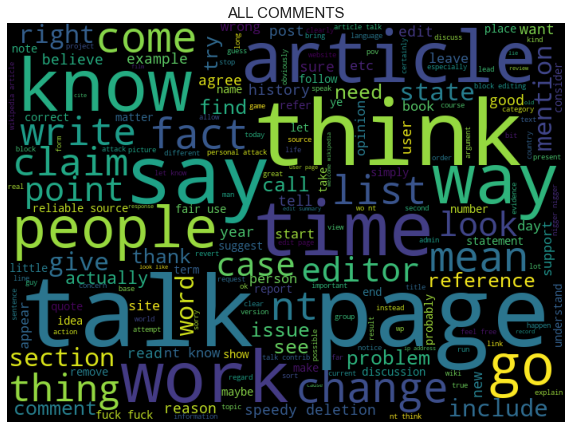

In [44]:
texts=train['comment_text'].values
wordcloud = WordCloud(background_color='black',width=700,height=500,colormap='viridis').generate(" ".join(texts))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.title('ALL COMMENTS',fontsize=15)
plt.grid(False)
plt.axis(False)

**Lets Split the data to perform further operations**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
training, testing=train_test_split(train, random_state=42, test_size=0.30, shuffle=True)

In [37]:
training.shape,testing.shape

((111699, 8), (47872, 8))

Now We'll convert these strings into vectors using **`TfidfVectorizer`**
* We need to find the most frequently occurring terms i.e. words with high term frequency or **tf**
* We also want a measure of how unique a word is i.e. how infrequently the word occurs across all documents i.e. inverse document frequency or **idf**
**Hence Tf-idf**

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

**Choosing an optimum value for `max_features` is very necessary especially when you are dealing with such a big dataset.**
* If the value is set too high the memory of your system will *fail to handle the amount of data*
* And if the value is set too low then you'd be *under-utilizing your data*
* Also cases like over-fitiing and under-fitting may also happen.

In [39]:
unique_words=len(set((' '.join(training['comment_text'].values)).split()))
print('Total unique words in the training corpus is ',unique_words,', this means the vectorizer can create at max ',unique_words," vectors & definitely while creating so many vectors we'll run out of memory")

Total unique words in the training corpus is  150423 , this means the vectorizer can create at max  150423  vectors & definitely while creating so many vectors we'll run out of memory


In [40]:
#I have used 2000 as max_features but a higher value could also be tried as per system configuration
tfidf=TfidfVectorizer(strip_accents='unicode',max_features=2000,min_df=2,max_df=0.9)

Creating a seperate dataframe for `'unique_w_count','sp_char','word_count'` named `feature1`

In [41]:
feature1=df[['unique_w_count','sp_char','word_count']]
feature1.head()

,unique_w_count,sp_char,word_count
0,44,0,43
1,23,1,17
2,43,0,42
3,90,1,109
4,17,0,13


In [42]:
from scipy.sparse import csr_matrix,hstack
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler1=MinMaxScaler(feature_range=(0,0.5))

**Scaling down above 3 features in range of `0,0.5`**

In [44]:
feature1_t=scaler1.fit_transform(feature1)
feature1_t=pd.DataFrame(feature1_t)
feature1_t.head()

,0,1,2
0,0.026543,0.000000,0.014979
1,0.013580,0.000101,0.005706
2,0.025926,0.000000,0.014622
3,0.054938,0.000101,0.038516
4,0.009877,0.000000,0.004280


Splitting these features according to train_test_split and then converting these `3 features` into sparse matrix

In [45]:
train_feat=csr_matrix(feature1_t.iloc[training.index,:])
test_feat=csr_matrix(feature1_t.iloc[testing.index,:])

In [46]:
train_feat.shape

(111699, 3)

**Generated vectors for each comment that resulting in `300 more features` for classification**

In [47]:
%%time
#took 37 minutes to complete
vec=[]
for i in range(train.shape[0]):
    text=train['comment_text'][i]
    print(i) #just to know the progress as there are 159571 entries
    vec.append(nlp(text).vector)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070


3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718


5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357


6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003


8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650


10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
1024

11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
1161

12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
1298

14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
1435

15552
15553
15554
15555
15556
15557
15558
15559
15560
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
1571

16919
16920
16921
16922
16923
16924
16925
16926
16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17074
17075
17076
17077
17078
17079
17080
17081
17082
17083
17084
1708

18299
18300
18301
18302
18303
18304
18305
18306
18307
18308
18309
18310
18311
18312
18313
18314
18315
18316
18317
18318
18319
18320
18321
18322
18323
18324
18325
18326
18327
18328
18329
18330
18331
18332
18333
18334
18335
18336
18337
18338
18339
18340
18341
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
18365
18366
18367
18368
18369
18370
18371
18372
18373
18374
18375
18376
18377
18378
18379
18380
18381
18382
18383
18384
18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18445
18446
18447
18448
18449
18450
18451
18452
18453
18454
18455
18456
18457
18458
18459
18460
18461
18462
18463
18464
1846

19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
19798
19799
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19811
19812
19813
19814
19815
19816
19817
19818
19819
19820
19821
19822
19823
19824
19825
19826
19827
19828
19829
19830
19831
19832
19833
19834
19835
19836
19837
19838
19839
19840
19841
19842
19843
19844
19845
19846
1984

21060
21061
21062
21063
21064
21065
21066
21067
21068
21069
21070
21071
21072
21073
21074
21075
21076
21077
21078
21079
21080
21081
21082
21083
21084
21085
21086
21087
21088
21089
21090
21091
21092
21093
21094
21095
21096
21097
21098
21099
21100
21101
21102
21103
21104
21105
21106
21107
21108
21109
21110
21111
21112
21113
21114
21115
21116
21117
21118
21119
21120
21121
21122
21123
21124
21125
21126
21127
21128
21129
21130
21131
21132
21133
21134
21135
21136
21137
21138
21139
21140
21141
21142
21143
21144
21145
21146
21147
21148
21149
21150
21151
21152
21153
21154
21155
21156
21157
21158
21159
21160
21161
21162
21163
21164
21165
21166
21167
21168
21169
21170
21171
21172
21173
21174
21175
21176
21177
21178
21179
21180
21181
21182
21183
21184
21185
21186
21187
21188
21189
21190
21191
21192
21193
21194
21195
21196
21197
21198
21199
21200
21201
21202
21203
21204
21205
21206
21207
21208
21209
21210
21211
21212
21213
21214
21215
21216
21217
21218
21219
21220
21221
21222
21223
21224
21225
2122

22437
22438
22439
22440
22441
22442
22443
22444
22445
22446
22447
22448
22449
22450
22451
22452
22453
22454
22455
22456
22457
22458
22459
22460
22461
22462
22463
22464
22465
22466
22467
22468
22469
22470
22471
22472
22473
22474
22475
22476
22477
22478
22479
22480
22481
22482
22483
22484
22485
22486
22487
22488
22489
22490
22491
22492
22493
22494
22495
22496
22497
22498
22499
22500
22501
22502
22503
22504
22505
22506
22507
22508
22509
22510
22511
22512
22513
22514
22515
22516
22517
22518
22519
22520
22521
22522
22523
22524
22525
22526
22527
22528
22529
22530
22531
22532
22533
22534
22535
22536
22537
22538
22539
22540
22541
22542
22543
22544
22545
22546
22547
22548
22549
22550
22551
22552
22553
22554
22555
22556
22557
22558
22559
22560
22561
22562
22563
22564
22565
22566
22567
22568
22569
22570
22571
22572
22573
22574
22575
22576
22577
22578
22579
22580
22581
22582
22583
22584
22585
22586
22587
22588
22589
22590
22591
22592
22593
22594
22595
22596
22597
22598
22599
22600
22601
22602
2260

23810
23811
23812
23813
23814
23815
23816
23817
23818
23819
23820
23821
23822
23823
23824
23825
23826
23827
23828
23829
23830
23831
23832
23833
23834
23835
23836
23837
23838
23839
23840
23841
23842
23843
23844
23845
23846
23847
23848
23849
23850
23851
23852
23853
23854
23855
23856
23857
23858
23859
23860
23861
23862
23863
23864
23865
23866
23867
23868
23869
23870
23871
23872
23873
23874
23875
23876
23877
23878
23879
23880
23881
23882
23883
23884
23885
23886
23887
23888
23889
23890
23891
23892
23893
23894
23895
23896
23897
23898
23899
23900
23901
23902
23903
23904
23905
23906
23907
23908
23909
23910
23911
23912
23913
23914
23915
23916
23917
23918
23919
23920
23921
23922
23923
23924
23925
23926
23927
23928
23929
23930
23931
23932
23933
23934
23935
23936
23937
23938
23939
23940
23941
23942
23943
23944
23945
23946
23947
23948
23949
23950
23951
23952
23953
23954
23955
23956
23957
23958
23959
23960
23961
23962
23963
23964
23965
23966
23967
23968
23969
23970
23971
23972
23973
23974
23975
2397

25180
25181
25182
25183
25184
25185
25186
25187
25188
25189
25190
25191
25192
25193
25194
25195
25196
25197
25198
25199
25200
25201
25202
25203
25204
25205
25206
25207
25208
25209
25210
25211
25212
25213
25214
25215
25216
25217
25218
25219
25220
25221
25222
25223
25224
25225
25226
25227
25228
25229
25230
25231
25232
25233
25234
25235
25236
25237
25238
25239
25240
25241
25242
25243
25244
25245
25246
25247
25248
25249
25250
25251
25252
25253
25254
25255
25256
25257
25258
25259
25260
25261
25262
25263
25264
25265
25266
25267
25268
25269
25270
25271
25272
25273
25274
25275
25276
25277
25278
25279
25280
25281
25282
25283
25284
25285
25286
25287
25288
25289
25290
25291
25292
25293
25294
25295
25296
25297
25298
25299
25300
25301
25302
25303
25304
25305
25306
25307
25308
25309
25310
25311
25312
25313
25314
25315
25316
25317
25318
25319
25320
25321
25322
25323
25324
25325
25326
25327
25328
25329
25330
25331
25332
25333
25334
25335
25336
25337
25338
25339
25340
25341
25342
25343
25344
25345
2534

26553
26554
26555
26556
26557
26558
26559
26560
26561
26562
26563
26564
26565
26566
26567
26568
26569
26570
26571
26572
26573
26574
26575
26576
26577
26578
26579
26580
26581
26582
26583
26584
26585
26586
26587
26588
26589
26590
26591
26592
26593
26594
26595
26596
26597
26598
26599
26600
26601
26602
26603
26604
26605
26606
26607
26608
26609
26610
26611
26612
26613
26614
26615
26616
26617
26618
26619
26620
26621
26622
26623
26624
26625
26626
26627
26628
26629
26630
26631
26632
26633
26634
26635
26636
26637
26638
26639
26640
26641
26642
26643
26644
26645
26646
26647
26648
26649
26650
26651
26652
26653
26654
26655
26656
26657
26658
26659
26660
26661
26662
26663
26664
26665
26666
26667
26668
26669
26670
26671
26672
26673
26674
26675
26676
26677
26678
26679
26680
26681
26682
26683
26684
26685
26686
26687
26688
26689
26690
26691
26692
26693
26694
26695
26696
26697
26698
26699
26700
26701
26702
26703
26704
26705
26706
26707
26708
26709
26710
26711
26712
26713
26714
26715
26716
26717
26718
2671

27925
27926
27927
27928
27929
27930
27931
27932
27933
27934
27935
27936
27937
27938
27939
27940
27941
27942
27943
27944
27945
27946
27947
27948
27949
27950
27951
27952
27953
27954
27955
27956
27957
27958
27959
27960
27961
27962
27963
27964
27965
27966
27967
27968
27969
27970
27971
27972
27973
27974
27975
27976
27977
27978
27979
27980
27981
27982
27983
27984
27985
27986
27987
27988
27989
27990
27991
27992
27993
27994
27995
27996
27997
27998
27999
28000
28001
28002
28003
28004
28005
28006
28007
28008
28009
28010
28011
28012
28013
28014
28015
28016
28017
28018
28019
28020
28021
28022
28023
28024
28025
28026
28027
28028
28029
28030
28031
28032
28033
28034
28035
28036
28037
28038
28039
28040
28041
28042
28043
28044
28045
28046
28047
28048
28049
28050
28051
28052
28053
28054
28055
28056
28057
28058
28059
28060
28061
28062
28063
28064
28065
28066
28067
28068
28069
28070
28071
28072
28073
28074
28075
28076
28077
28078
28079
28080
28081
28082
28083
28084
28085
28086
28087
28088
28089
28090
2809

29295
29296
29297
29298
29299
29300
29301
29302
29303
29304
29305
29306
29307
29308
29309
29310
29311
29312
29313
29314
29315
29316
29317
29318
29319
29320
29321
29322
29323
29324
29325
29326
29327
29328
29329
29330
29331
29332
29333
29334
29335
29336
29337
29338
29339
29340
29341
29342
29343
29344
29345
29346
29347
29348
29349
29350
29351
29352
29353
29354
29355
29356
29357
29358
29359
29360
29361
29362
29363
29364
29365
29366
29367
29368
29369
29370
29371
29372
29373
29374
29375
29376
29377
29378
29379
29380
29381
29382
29383
29384
29385
29386
29387
29388
29389
29390
29391
29392
29393
29394
29395
29396
29397
29398
29399
29400
29401
29402
29403
29404
29405
29406
29407
29408
29409
29410
29411
29412
29413
29414
29415
29416
29417
29418
29419
29420
29421
29422
29423
29424
29425
29426
29427
29428
29429
29430
29431
29432
29433
29434
29435
29436
29437
29438
29439
29440
29441
29442
29443
29444
29445
29446
29447
29448
29449
29450
29451
29452
29453
29454
29455
29456
29457
29458
29459
29460
2946

30667
30668
30669
30670
30671
30672
30673
30674
30675
30676
30677
30678
30679
30680
30681
30682
30683
30684
30685
30686
30687
30688
30689
30690
30691
30692
30693
30694
30695
30696
30697
30698
30699
30700
30701
30702
30703
30704
30705
30706
30707
30708
30709
30710
30711
30712
30713
30714
30715
30716
30717
30718
30719
30720
30721
30722
30723
30724
30725
30726
30727
30728
30729
30730
30731
30732
30733
30734
30735
30736
30737
30738
30739
30740
30741
30742
30743
30744
30745
30746
30747
30748
30749
30750
30751
30752
30753
30754
30755
30756
30757
30758
30759
30760
30761
30762
30763
30764
30765
30766
30767
30768
30769
30770
30771
30772
30773
30774
30775
30776
30777
30778
30779
30780
30781
30782
30783
30784
30785
30786
30787
30788
30789
30790
30791
30792
30793
30794
30795
30796
30797
30798
30799
30800
30801
30802
30803
30804
30805
30806
30807
30808
30809
30810
30811
30812
30813
30814
30815
30816
30817
30818
30819
30820
30821
30822
30823
30824
30825
30826
30827
30828
30829
30830
30831
30832
3083

32050
32051
32052
32053
32054
32055
32056
32057
32058
32059
32060
32061
32062
32063
32064
32065
32066
32067
32068
32069
32070
32071
32072
32073
32074
32075
32076
32077
32078
32079
32080
32081
32082
32083
32084
32085
32086
32087
32088
32089
32090
32091
32092
32093
32094
32095
32096
32097
32098
32099
32100
32101
32102
32103
32104
32105
32106
32107
32108
32109
32110
32111
32112
32113
32114
32115
32116
32117
32118
32119
32120
32121
32122
32123
32124
32125
32126
32127
32128
32129
32130
32131
32132
32133
32134
32135
32136
32137
32138
32139
32140
32141
32142
32143
32144
32145
32146
32147
32148
32149
32150
32151
32152
32153
32154
32155
32156
32157
32158
32159
32160
32161
32162
32163
32164
32165
32166
32167
32168
32169
32170
32171
32172
32173
32174
32175
32176
32177
32178
32179
32180
32181
32182
32183
32184
32185
32186
32187
32188
32189
32190
32191
32192
32193
32194
32195
32196
32197
32198
32199
32200
32201
32202
32203
32204
32205
32206
32207
32208
32209
32210
32211
32212
32213
32214
32215
3221

33422
33423
33424
33425
33426
33427
33428
33429
33430
33431
33432
33433
33434
33435
33436
33437
33438
33439
33440
33441
33442
33443
33444
33445
33446
33447
33448
33449
33450
33451
33452
33453
33454
33455
33456
33457
33458
33459
33460
33461
33462
33463
33464
33465
33466
33467
33468
33469
33470
33471
33472
33473
33474
33475
33476
33477
33478
33479
33480
33481
33482
33483
33484
33485
33486
33487
33488
33489
33490
33491
33492
33493
33494
33495
33496
33497
33498
33499
33500
33501
33502
33503
33504
33505
33506
33507
33508
33509
33510
33511
33512
33513
33514
33515
33516
33517
33518
33519
33520
33521
33522
33523
33524
33525
33526
33527
33528
33529
33530
33531
33532
33533
33534
33535
33536
33537
33538
33539
33540
33541
33542
33543
33544
33545
33546
33547
33548
33549
33550
33551
33552
33553
33554
33555
33556
33557
33558
33559
33560
33561
33562
33563
33564
33565
33566
33567
33568
33569
33570
33571
33572
33573
33574
33575
33576
33577
33578
33579
33580
33581
33582
33583
33584
33585
33586
33587
3358

34793
34794
34795
34796
34797
34798
34799
34800
34801
34802
34803
34804
34805
34806
34807
34808
34809
34810
34811
34812
34813
34814
34815
34816
34817
34818
34819
34820
34821
34822
34823
34824
34825
34826
34827
34828
34829
34830
34831
34832
34833
34834
34835
34836
34837
34838
34839
34840
34841
34842
34843
34844
34845
34846
34847
34848
34849
34850
34851
34852
34853
34854
34855
34856
34857
34858
34859
34860
34861
34862
34863
34864
34865
34866
34867
34868
34869
34870
34871
34872
34873
34874
34875
34876
34877
34878
34879
34880
34881
34882
34883
34884
34885
34886
34887
34888
34889
34890
34891
34892
34893
34894
34895
34896
34897
34898
34899
34900
34901
34902
34903
34904
34905
34906
34907
34908
34909
34910
34911
34912
34913
34914
34915
34916
34917
34918
34919
34920
34921
34922
34923
34924
34925
34926
34927
34928
34929
34930
34931
34932
34933
34934
34935
34936
34937
34938
34939
34940
34941
34942
34943
34944
34945
34946
34947
34948
34949
34950
34951
34952
34953
34954
34955
34956
34957
34958
3495

36161
36162
36163
36164
36165
36166
36167
36168
36169
36170
36171
36172
36173
36174
36175
36176
36177
36178
36179
36180
36181
36182
36183
36184
36185
36186
36187
36188
36189
36190
36191
36192
36193
36194
36195
36196
36197
36198
36199
36200
36201
36202
36203
36204
36205
36206
36207
36208
36209
36210
36211
36212
36213
36214
36215
36216
36217
36218
36219
36220
36221
36222
36223
36224
36225
36226
36227
36228
36229
36230
36231
36232
36233
36234
36235
36236
36237
36238
36239
36240
36241
36242
36243
36244
36245
36246
36247
36248
36249
36250
36251
36252
36253
36254
36255
36256
36257
36258
36259
36260
36261
36262
36263
36264
36265
36266
36267
36268
36269
36270
36271
36272
36273
36274
36275
36276
36277
36278
36279
36280
36281
36282
36283
36284
36285
36286
36287
36288
36289
36290
36291
36292
36293
36294
36295
36296
36297
36298
36299
36300
36301
36302
36303
36304
36305
36306
36307
36308
36309
36310
36311
36312
36313
36314
36315
36316
36317
36318
36319
36320
36321
36322
36323
36324
36325
36326
3632

37532
37533
37534
37535
37536
37537
37538
37539
37540
37541
37542
37543
37544
37545
37546
37547
37548
37549
37550
37551
37552
37553
37554
37555
37556
37557
37558
37559
37560
37561
37562
37563
37564
37565
37566
37567
37568
37569
37570
37571
37572
37573
37574
37575
37576
37577
37578
37579
37580
37581
37582
37583
37584
37585
37586
37587
37588
37589
37590
37591
37592
37593
37594
37595
37596
37597
37598
37599
37600
37601
37602
37603
37604
37605
37606
37607
37608
37609
37610
37611
37612
37613
37614
37615
37616
37617
37618
37619
37620
37621
37622
37623
37624
37625
37626
37627
37628
37629
37630
37631
37632
37633
37634
37635
37636
37637
37638
37639
37640
37641
37642
37643
37644
37645
37646
37647
37648
37649
37650
37651
37652
37653
37654
37655
37656
37657
37658
37659
37660
37661
37662
37663
37664
37665
37666
37667
37668
37669
37670
37671
37672
37673
37674
37675
37676
37677
37678
37679
37680
37681
37682
37683
37684
37685
37686
37687
37688
37689
37690
37691
37692
37693
37694
37695
37696
37697
3769

38908
38909
38910
38911
38912
38913
38914
38915
38916
38917
38918
38919
38920
38921
38922
38923
38924
38925
38926
38927
38928
38929
38930
38931
38932
38933
38934
38935
38936
38937
38938
38939
38940
38941
38942
38943
38944
38945
38946
38947
38948
38949
38950
38951
38952
38953
38954
38955
38956
38957
38958
38959
38960
38961
38962
38963
38964
38965
38966
38967
38968
38969
38970
38971
38972
38973
38974
38975
38976
38977
38978
38979
38980
38981
38982
38983
38984
38985
38986
38987
38988
38989
38990
38991
38992
38993
38994
38995
38996
38997
38998
38999
39000
39001
39002
39003
39004
39005
39006
39007
39008
39009
39010
39011
39012
39013
39014
39015
39016
39017
39018
39019
39020
39021
39022
39023
39024
39025
39026
39027
39028
39029
39030
39031
39032
39033
39034
39035
39036
39037
39038
39039
39040
39041
39042
39043
39044
39045
39046
39047
39048
39049
39050
39051
39052
39053
39054
39055
39056
39057
39058
39059
39060
39061
39062
39063
39064
39065
39066
39067
39068
39069
39070
39071
39072
39073
3907

40274
40275
40276
40277
40278
40279
40280
40281
40282
40283
40284
40285
40286
40287
40288
40289
40290
40291
40292
40293
40294
40295
40296
40297
40298
40299
40300
40301
40302
40303
40304
40305
40306
40307
40308
40309
40310
40311
40312
40313
40314
40315
40316
40317
40318
40319
40320
40321
40322
40323
40324
40325
40326
40327
40328
40329
40330
40331
40332
40333
40334
40335
40336
40337
40338
40339
40340
40341
40342
40343
40344
40345
40346
40347
40348
40349
40350
40351
40352
40353
40354
40355
40356
40357
40358
40359
40360
40361
40362
40363
40364
40365
40366
40367
40368
40369
40370
40371
40372
40373
40374
40375
40376
40377
40378
40379
40380
40381
40382
40383
40384
40385
40386
40387
40388
40389
40390
40391
40392
40393
40394
40395
40396
40397
40398
40399
40400
40401
40402
40403
40404
40405
40406
40407
40408
40409
40410
40411
40412
40413
40414
40415
40416
40417
40418
40419
40420
40421
40422
40423
40424
40425
40426
40427
40428
40429
40430
40431
40432
40433
40434
40435
40436
40437
40438
40439
4044

41642
41643
41644
41645
41646
41647
41648
41649
41650
41651
41652
41653
41654
41655
41656
41657
41658
41659
41660
41661
41662
41663
41664
41665
41666
41667
41668
41669
41670
41671
41672
41673
41674
41675
41676
41677
41678
41679
41680
41681
41682
41683
41684
41685
41686
41687
41688
41689
41690
41691
41692
41693
41694
41695
41696
41697
41698
41699
41700
41701
41702
41703
41704
41705
41706
41707
41708
41709
41710
41711
41712
41713
41714
41715
41716
41717
41718
41719
41720
41721
41722
41723
41724
41725
41726
41727
41728
41729
41730
41731
41732
41733
41734
41735
41736
41737
41738
41739
41740
41741
41742
41743
41744
41745
41746
41747
41748
41749
41750
41751
41752
41753
41754
41755
41756
41757
41758
41759
41760
41761
41762
41763
41764
41765
41766
41767
41768
41769
41770
41771
41772
41773
41774
41775
41776
41777
41778
41779
41780
41781
41782
41783
41784
41785
41786
41787
41788
41789
41790
41791
41792
41793
41794
41795
41796
41797
41798
41799
41800
41801
41802
41803
41804
41805
41806
41807
4180

43013
43014
43015
43016
43017
43018
43019
43020
43021
43022
43023
43024
43025
43026
43027
43028
43029
43030
43031
43032
43033
43034
43035
43036
43037
43038
43039
43040
43041
43042
43043
43044
43045
43046
43047
43048
43049
43050
43051
43052
43053
43054
43055
43056
43057
43058
43059
43060
43061
43062
43063
43064
43065
43066
43067
43068
43069
43070
43071
43072
43073
43074
43075
43076
43077
43078
43079
43080
43081
43082
43083
43084
43085
43086
43087
43088
43089
43090
43091
43092
43093
43094
43095
43096
43097
43098
43099
43100
43101
43102
43103
43104
43105
43106
43107
43108
43109
43110
43111
43112
43113
43114
43115
43116
43117
43118
43119
43120
43121
43122
43123
43124
43125
43126
43127
43128
43129
43130
43131
43132
43133
43134
43135
43136
43137
43138
43139
43140
43141
43142
43143
43144
43145
43146
43147
43148
43149
43150
43151
43152
43153
43154
43155
43156
43157
43158
43159
43160
43161
43162
43163
43164
43165
43166
43167
43168
43169
43170
43171
43172
43173
43174
43175
43176
43177
43178
4317

44386
44387
44388
44389
44390
44391
44392
44393
44394
44395
44396
44397
44398
44399
44400
44401
44402
44403
44404
44405
44406
44407
44408
44409
44410
44411
44412
44413
44414
44415
44416
44417
44418
44419
44420
44421
44422
44423
44424
44425
44426
44427
44428
44429
44430
44431
44432
44433
44434
44435
44436
44437
44438
44439
44440
44441
44442
44443
44444
44445
44446
44447
44448
44449
44450
44451
44452
44453
44454
44455
44456
44457
44458
44459
44460
44461
44462
44463
44464
44465
44466
44467
44468
44469
44470
44471
44472
44473
44474
44475
44476
44477
44478
44479
44480
44481
44482
44483
44484
44485
44486
44487
44488
44489
44490
44491
44492
44493
44494
44495
44496
44497
44498
44499
44500
44501
44502
44503
44504
44505
44506
44507
44508
44509
44510
44511
44512
44513
44514
44515
44516
44517
44518
44519
44520
44521
44522
44523
44524
44525
44526
44527
44528
44529
44530
44531
44532
44533
44534
44535
44536
44537
44538
44539
44540
44541
44542
44543
44544
44545
44546
44547
44548
44549
44550
44551
4455

45766
45767
45768
45769
45770
45771
45772
45773
45774
45775
45776
45777
45778
45779
45780
45781
45782
45783
45784
45785
45786
45787
45788
45789
45790
45791
45792
45793
45794
45795
45796
45797
45798
45799
45800
45801
45802
45803
45804
45805
45806
45807
45808
45809
45810
45811
45812
45813
45814
45815
45816
45817
45818
45819
45820
45821
45822
45823
45824
45825
45826
45827
45828
45829
45830
45831
45832
45833
45834
45835
45836
45837
45838
45839
45840
45841
45842
45843
45844
45845
45846
45847
45848
45849
45850
45851
45852
45853
45854
45855
45856
45857
45858
45859
45860
45861
45862
45863
45864
45865
45866
45867
45868
45869
45870
45871
45872
45873
45874
45875
45876
45877
45878
45879
45880
45881
45882
45883
45884
45885
45886
45887
45888
45889
45890
45891
45892
45893
45894
45895
45896
45897
45898
45899
45900
45901
45902
45903
45904
45905
45906
45907
45908
45909
45910
45911
45912
45913
45914
45915
45916
45917
45918
45919
45920
45921
45922
45923
45924
45925
45926
45927
45928
45929
45930
45931
4593

47136
47137
47138
47139
47140
47141
47142
47143
47144
47145
47146
47147
47148
47149
47150
47151
47152
47153
47154
47155
47156
47157
47158
47159
47160
47161
47162
47163
47164
47165
47166
47167
47168
47169
47170
47171
47172
47173
47174
47175
47176
47177
47178
47179
47180
47181
47182
47183
47184
47185
47186
47187
47188
47189
47190
47191
47192
47193
47194
47195
47196
47197
47198
47199
47200
47201
47202
47203
47204
47205
47206
47207
47208
47209
47210
47211
47212
47213
47214
47215
47216
47217
47218
47219
47220
47221
47222
47223
47224
47225
47226
47227
47228
47229
47230
47231
47232
47233
47234
47235
47236
47237
47238
47239
47240
47241
47242
47243
47244
47245
47246
47247
47248
47249
47250
47251
47252
47253
47254
47255
47256
47257
47258
47259
47260
47261
47262
47263
47264
47265
47266
47267
47268
47269
47270
47271
47272
47273
47274
47275
47276
47277
47278
47279
47280
47281
47282
47283
47284
47285
47286
47287
47288
47289
47290
47291
47292
47293
47294
47295
47296
47297
47298
47299
47300
47301
4730

48516
48517
48518
48519
48520
48521
48522
48523
48524
48525
48526
48527
48528
48529
48530
48531
48532
48533
48534
48535
48536
48537
48538
48539
48540
48541
48542
48543
48544
48545
48546
48547
48548
48549
48550
48551
48552
48553
48554
48555
48556
48557
48558
48559
48560
48561
48562
48563
48564
48565
48566
48567
48568
48569
48570
48571
48572
48573
48574
48575
48576
48577
48578
48579
48580
48581
48582
48583
48584
48585
48586
48587
48588
48589
48590
48591
48592
48593
48594
48595
48596
48597
48598
48599
48600
48601
48602
48603
48604
48605
48606
48607
48608
48609
48610
48611
48612
48613
48614
48615
48616
48617
48618
48619
48620
48621
48622
48623
48624
48625
48626
48627
48628
48629
48630
48631
48632
48633
48634
48635
48636
48637
48638
48639
48640
48641
48642
48643
48644
48645
48646
48647
48648
48649
48650
48651
48652
48653
48654
48655
48656
48657
48658
48659
48660
48661
48662
48663
48664
48665
48666
48667
48668
48669
48670
48671
48672
48673
48674
48675
48676
48677
48678
48679
48680
48681
4868

49882
49883
49884
49885
49886
49887
49888
49889
49890
49891
49892
49893
49894
49895
49896
49897
49898
49899
49900
49901
49902
49903
49904
49905
49906
49907
49908
49909
49910
49911
49912
49913
49914
49915
49916
49917
49918
49919
49920
49921
49922
49923
49924
49925
49926
49927
49928
49929
49930
49931
49932
49933
49934
49935
49936
49937
49938
49939
49940
49941
49942
49943
49944
49945
49946
49947
49948
49949
49950
49951
49952
49953
49954
49955
49956
49957
49958
49959
49960
49961
49962
49963
49964
49965
49966
49967
49968
49969
49970
49971
49972
49973
49974
49975
49976
49977
49978
49979
49980
49981
49982
49983
49984
49985
49986
49987
49988
49989
49990
49991
49992
49993
49994
49995
49996
49997
49998
49999
50000
50001
50002
50003
50004
50005
50006
50007
50008
50009
50010
50011
50012
50013
50014
50015
50016
50017
50018
50019
50020
50021
50022
50023
50024
50025
50026
50027
50028
50029
50030
50031
50032
50033
50034
50035
50036
50037
50038
50039
50040
50041
50042
50043
50044
50045
50046
50047
5004

51267
51268
51269
51270
51271
51272
51273
51274
51275
51276
51277
51278
51279
51280
51281
51282
51283
51284
51285
51286
51287
51288
51289
51290
51291
51292
51293
51294
51295
51296
51297
51298
51299
51300
51301
51302
51303
51304
51305
51306
51307
51308
51309
51310
51311
51312
51313
51314
51315
51316
51317
51318
51319
51320
51321
51322
51323
51324
51325
51326
51327
51328
51329
51330
51331
51332
51333
51334
51335
51336
51337
51338
51339
51340
51341
51342
51343
51344
51345
51346
51347
51348
51349
51350
51351
51352
51353
51354
51355
51356
51357
51358
51359
51360
51361
51362
51363
51364
51365
51366
51367
51368
51369
51370
51371
51372
51373
51374
51375
51376
51377
51378
51379
51380
51381
51382
51383
51384
51385
51386
51387
51388
51389
51390
51391
51392
51393
51394
51395
51396
51397
51398
51399
51400
51401
51402
51403
51404
51405
51406
51407
51408
51409
51410
51411
51412
51413
51414
51415
51416
51417
51418
51419
51420
51421
51422
51423
51424
51425
51426
51427
51428
51429
51430
51431
51432
5143

52638
52639
52640
52641
52642
52643
52644
52645
52646
52647
52648
52649
52650
52651
52652
52653
52654
52655
52656
52657
52658
52659
52660
52661
52662
52663
52664
52665
52666
52667
52668
52669
52670
52671
52672
52673
52674
52675
52676
52677
52678
52679
52680
52681
52682
52683
52684
52685
52686
52687
52688
52689
52690
52691
52692
52693
52694
52695
52696
52697
52698
52699
52700
52701
52702
52703
52704
52705
52706
52707
52708
52709
52710
52711
52712
52713
52714
52715
52716
52717
52718
52719
52720
52721
52722
52723
52724
52725
52726
52727
52728
52729
52730
52731
52732
52733
52734
52735
52736
52737
52738
52739
52740
52741
52742
52743
52744
52745
52746
52747
52748
52749
52750
52751
52752
52753
52754
52755
52756
52757
52758
52759
52760
52761
52762
52763
52764
52765
52766
52767
52768
52769
52770
52771
52772
52773
52774
52775
52776
52777
52778
52779
52780
52781
52782
52783
52784
52785
52786
52787
52788
52789
52790
52791
52792
52793
52794
52795
52796
52797
52798
52799
52800
52801
52802
52803
5280

54012
54013
54014
54015
54016
54017
54018
54019
54020
54021
54022
54023
54024
54025
54026
54027
54028
54029
54030
54031
54032
54033
54034
54035
54036
54037
54038
54039
54040
54041
54042
54043
54044
54045
54046
54047
54048
54049
54050
54051
54052
54053
54054
54055
54056
54057
54058
54059
54060
54061
54062
54063
54064
54065
54066
54067
54068
54069
54070
54071
54072
54073
54074
54075
54076
54077
54078
54079
54080
54081
54082
54083
54084
54085
54086
54087
54088
54089
54090
54091
54092
54093
54094
54095
54096
54097
54098
54099
54100
54101
54102
54103
54104
54105
54106
54107
54108
54109
54110
54111
54112
54113
54114
54115
54116
54117
54118
54119
54120
54121
54122
54123
54124
54125
54126
54127
54128
54129
54130
54131
54132
54133
54134
54135
54136
54137
54138
54139
54140
54141
54142
54143
54144
54145
54146
54147
54148
54149
54150
54151
54152
54153
54154
54155
54156
54157
54158
54159
54160
54161
54162
54163
54164
54165
54166
54167
54168
54169
54170
54171
54172
54173
54174
54175
54176
54177
5417

55386
55387
55388
55389
55390
55391
55392
55393
55394
55395
55396
55397
55398
55399
55400
55401
55402
55403
55404
55405
55406
55407
55408
55409
55410
55411
55412
55413
55414
55415
55416
55417
55418
55419
55420
55421
55422
55423
55424
55425
55426
55427
55428
55429
55430
55431
55432
55433
55434
55435
55436
55437
55438
55439
55440
55441
55442
55443
55444
55445
55446
55447
55448
55449
55450
55451
55452
55453
55454
55455
55456
55457
55458
55459
55460
55461
55462
55463
55464
55465
55466
55467
55468
55469
55470
55471
55472
55473
55474
55475
55476
55477
55478
55479
55480
55481
55482
55483
55484
55485
55486
55487
55488
55489
55490
55491
55492
55493
55494
55495
55496
55497
55498
55499
55500
55501
55502
55503
55504
55505
55506
55507
55508
55509
55510
55511
55512
55513
55514
55515
55516
55517
55518
55519
55520
55521
55522
55523
55524
55525
55526
55527
55528
55529
55530
55531
55532
55533
55534
55535
55536
55537
55538
55539
55540
55541
55542
55543
55544
55545
55546
55547
55548
55549
55550
55551
5555

56752
56753
56754
56755
56756
56757
56758
56759
56760
56761
56762
56763
56764
56765
56766
56767
56768
56769
56770
56771
56772
56773
56774
56775
56776
56777
56778
56779
56780
56781
56782
56783
56784
56785
56786
56787
56788
56789
56790
56791
56792
56793
56794
56795
56796
56797
56798
56799
56800
56801
56802
56803
56804
56805
56806
56807
56808
56809
56810
56811
56812
56813
56814
56815
56816
56817
56818
56819
56820
56821
56822
56823
56824
56825
56826
56827
56828
56829
56830
56831
56832
56833
56834
56835
56836
56837
56838
56839
56840
56841
56842
56843
56844
56845
56846
56847
56848
56849
56850
56851
56852
56853
56854
56855
56856
56857
56858
56859
56860
56861
56862
56863
56864
56865
56866
56867
56868
56869
56870
56871
56872
56873
56874
56875
56876
56877
56878
56879
56880
56881
56882
56883
56884
56885
56886
56887
56888
56889
56890
56891
56892
56893
56894
56895
56896
56897
56898
56899
56900
56901
56902
56903
56904
56905
56906
56907
56908
56909
56910
56911
56912
56913
56914
56915
56916
56917
5691

58121
58122
58123
58124
58125
58126
58127
58128
58129
58130
58131
58132
58133
58134
58135
58136
58137
58138
58139
58140
58141
58142
58143
58144
58145
58146
58147
58148
58149
58150
58151
58152
58153
58154
58155
58156
58157
58158
58159
58160
58161
58162
58163
58164
58165
58166
58167
58168
58169
58170
58171
58172
58173
58174
58175
58176
58177
58178
58179
58180
58181
58182
58183
58184
58185
58186
58187
58188
58189
58190
58191
58192
58193
58194
58195
58196
58197
58198
58199
58200
58201
58202
58203
58204
58205
58206
58207
58208
58209
58210
58211
58212
58213
58214
58215
58216
58217
58218
58219
58220
58221
58222
58223
58224
58225
58226
58227
58228
58229
58230
58231
58232
58233
58234
58235
58236
58237
58238
58239
58240
58241
58242
58243
58244
58245
58246
58247
58248
58249
58250
58251
58252
58253
58254
58255
58256
58257
58258
58259
58260
58261
58262
58263
58264
58265
58266
58267
58268
58269
58270
58271
58272
58273
58274
58275
58276
58277
58278
58279
58280
58281
58282
58283
58284
58285
58286
5828

59497
59498
59499
59500
59501
59502
59503
59504
59505
59506
59507
59508
59509
59510
59511
59512
59513
59514
59515
59516
59517
59518
59519
59520
59521
59522
59523
59524
59525
59526
59527
59528
59529
59530
59531
59532
59533
59534
59535
59536
59537
59538
59539
59540
59541
59542
59543
59544
59545
59546
59547
59548
59549
59550
59551
59552
59553
59554
59555
59556
59557
59558
59559
59560
59561
59562
59563
59564
59565
59566
59567
59568
59569
59570
59571
59572
59573
59574
59575
59576
59577
59578
59579
59580
59581
59582
59583
59584
59585
59586
59587
59588
59589
59590
59591
59592
59593
59594
59595
59596
59597
59598
59599
59600
59601
59602
59603
59604
59605
59606
59607
59608
59609
59610
59611
59612
59613
59614
59615
59616
59617
59618
59619
59620
59621
59622
59623
59624
59625
59626
59627
59628
59629
59630
59631
59632
59633
59634
59635
59636
59637
59638
59639
59640
59641
59642
59643
59644
59645
59646
59647
59648
59649
59650
59651
59652
59653
59654
59655
59656
59657
59658
59659
59660
59661
59662
5966

60877
60878
60879
60880
60881
60882
60883
60884
60885
60886
60887
60888
60889
60890
60891
60892
60893
60894
60895
60896
60897
60898
60899
60900
60901
60902
60903
60904
60905
60906
60907
60908
60909
60910
60911
60912
60913
60914
60915
60916
60917
60918
60919
60920
60921
60922
60923
60924
60925
60926
60927
60928
60929
60930
60931
60932
60933
60934
60935
60936
60937
60938
60939
60940
60941
60942
60943
60944
60945
60946
60947
60948
60949
60950
60951
60952
60953
60954
60955
60956
60957
60958
60959
60960
60961
60962
60963
60964
60965
60966
60967
60968
60969
60970
60971
60972
60973
60974
60975
60976
60977
60978
60979
60980
60981
60982
60983
60984
60985
60986
60987
60988
60989
60990
60991
60992
60993
60994
60995
60996
60997
60998
60999
61000
61001
61002
61003
61004
61005
61006
61007
61008
61009
61010
61011
61012
61013
61014
61015
61016
61017
61018
61019
61020
61021
61022
61023
61024
61025
61026
61027
61028
61029
61030
61031
61032
61033
61034
61035
61036
61037
61038
61039
61040
61041
61042
6104

62246
62247
62248
62249
62250
62251
62252
62253
62254
62255
62256
62257
62258
62259
62260
62261
62262
62263
62264
62265
62266
62267
62268
62269
62270
62271
62272
62273
62274
62275
62276
62277
62278
62279
62280
62281
62282
62283
62284
62285
62286
62287
62288
62289
62290
62291
62292
62293
62294
62295
62296
62297
62298
62299
62300
62301
62302
62303
62304
62305
62306
62307
62308
62309
62310
62311
62312
62313
62314
62315
62316
62317
62318
62319
62320
62321
62322
62323
62324
62325
62326
62327
62328
62329
62330
62331
62332
62333
62334
62335
62336
62337
62338
62339
62340
62341
62342
62343
62344
62345
62346
62347
62348
62349
62350
62351
62352
62353
62354
62355
62356
62357
62358
62359
62360
62361
62362
62363
62364
62365
62366
62367
62368
62369
62370
62371
62372
62373
62374
62375
62376
62377
62378
62379
62380
62381
62382
62383
62384
62385
62386
62387
62388
62389
62390
62391
62392
62393
62394
62395
62396
62397
62398
62399
62400
62401
62402
62403
62404
62405
62406
62407
62408
62409
62410
62411
6241

63618
63619
63620
63621
63622
63623
63624
63625
63626
63627
63628
63629
63630
63631
63632
63633
63634
63635
63636
63637
63638
63639
63640
63641
63642
63643
63644
63645
63646
63647
63648
63649
63650
63651
63652
63653
63654
63655
63656
63657
63658
63659
63660
63661
63662
63663
63664
63665
63666
63667
63668
63669
63670
63671
63672
63673
63674
63675
63676
63677
63678
63679
63680
63681
63682
63683
63684
63685
63686
63687
63688
63689
63690
63691
63692
63693
63694
63695
63696
63697
63698
63699
63700
63701
63702
63703
63704
63705
63706
63707
63708
63709
63710
63711
63712
63713
63714
63715
63716
63717
63718
63719
63720
63721
63722
63723
63724
63725
63726
63727
63728
63729
63730
63731
63732
63733
63734
63735
63736
63737
63738
63739
63740
63741
63742
63743
63744
63745
63746
63747
63748
63749
63750
63751
63752
63753
63754
63755
63756
63757
63758
63759
63760
63761
63762
63763
63764
63765
63766
63767
63768
63769
63770
63771
63772
63773
63774
63775
63776
63777
63778
63779
63780
63781
63782
63783
6378

64997
64998
64999
65000
65001
65002
65003
65004
65005
65006
65007
65008
65009
65010
65011
65012
65013
65014
65015
65016
65017
65018
65019
65020
65021
65022
65023
65024
65025
65026
65027
65028
65029
65030
65031
65032
65033
65034
65035
65036
65037
65038
65039
65040
65041
65042
65043
65044
65045
65046
65047
65048
65049
65050
65051
65052
65053
65054
65055
65056
65057
65058
65059
65060
65061
65062
65063
65064
65065
65066
65067
65068
65069
65070
65071
65072
65073
65074
65075
65076
65077
65078
65079
65080
65081
65082
65083
65084
65085
65086
65087
65088
65089
65090
65091
65092
65093
65094
65095
65096
65097
65098
65099
65100
65101
65102
65103
65104
65105
65106
65107
65108
65109
65110
65111
65112
65113
65114
65115
65116
65117
65118
65119
65120
65121
65122
65123
65124
65125
65126
65127
65128
65129
65130
65131
65132
65133
65134
65135
65136
65137
65138
65139
65140
65141
65142
65143
65144
65145
65146
65147
65148
65149
65150
65151
65152
65153
65154
65155
65156
65157
65158
65159
65160
65161
65162
6516

66372
66373
66374
66375
66376
66377
66378
66379
66380
66381
66382
66383
66384
66385
66386
66387
66388
66389
66390
66391
66392
66393
66394
66395
66396
66397
66398
66399
66400
66401
66402
66403
66404
66405
66406
66407
66408
66409
66410
66411
66412
66413
66414
66415
66416
66417
66418
66419
66420
66421
66422
66423
66424
66425
66426
66427
66428
66429
66430
66431
66432
66433
66434
66435
66436
66437
66438
66439
66440
66441
66442
66443
66444
66445
66446
66447
66448
66449
66450
66451
66452
66453
66454
66455
66456
66457
66458
66459
66460
66461
66462
66463
66464
66465
66466
66467
66468
66469
66470
66471
66472
66473
66474
66475
66476
66477
66478
66479
66480
66481
66482
66483
66484
66485
66486
66487
66488
66489
66490
66491
66492
66493
66494
66495
66496
66497
66498
66499
66500
66501
66502
66503
66504
66505
66506
66507
66508
66509
66510
66511
66512
66513
66514
66515
66516
66517
66518
66519
66520
66521
66522
66523
66524
66525
66526
66527
66528
66529
66530
66531
66532
66533
66534
66535
66536
66537
6653

67750
67751
67752
67753
67754
67755
67756
67757
67758
67759
67760
67761
67762
67763
67764
67765
67766
67767
67768
67769
67770
67771
67772
67773
67774
67775
67776
67777
67778
67779
67780
67781
67782
67783
67784
67785
67786
67787
67788
67789
67790
67791
67792
67793
67794
67795
67796
67797
67798
67799
67800
67801
67802
67803
67804
67805
67806
67807
67808
67809
67810
67811
67812
67813
67814
67815
67816
67817
67818
67819
67820
67821
67822
67823
67824
67825
67826
67827
67828
67829
67830
67831
67832
67833
67834
67835
67836
67837
67838
67839
67840
67841
67842
67843
67844
67845
67846
67847
67848
67849
67850
67851
67852
67853
67854
67855
67856
67857
67858
67859
67860
67861
67862
67863
67864
67865
67866
67867
67868
67869
67870
67871
67872
67873
67874
67875
67876
67877
67878
67879
67880
67881
67882
67883
67884
67885
67886
67887
67888
67889
67890
67891
67892
67893
67894
67895
67896
67897
67898
67899
67900
67901
67902
67903
67904
67905
67906
67907
67908
67909
67910
67911
67912
67913
67914
67915
6791

69117
69118
69119
69120
69121
69122
69123
69124
69125
69126
69127
69128
69129
69130
69131
69132
69133
69134
69135
69136
69137
69138
69139
69140
69141
69142
69143
69144
69145
69146
69147
69148
69149
69150
69151
69152
69153
69154
69155
69156
69157
69158
69159
69160
69161
69162
69163
69164
69165
69166
69167
69168
69169
69170
69171
69172
69173
69174
69175
69176
69177
69178
69179
69180
69181
69182
69183
69184
69185
69186
69187
69188
69189
69190
69191
69192
69193
69194
69195
69196
69197
69198
69199
69200
69201
69202
69203
69204
69205
69206
69207
69208
69209
69210
69211
69212
69213
69214
69215
69216
69217
69218
69219
69220
69221
69222
69223
69224
69225
69226
69227
69228
69229
69230
69231
69232
69233
69234
69235
69236
69237
69238
69239
69240
69241
69242
69243
69244
69245
69246
69247
69248
69249
69250
69251
69252
69253
69254
69255
69256
69257
69258
69259
69260
69261
69262
69263
69264
69265
69266
69267
69268
69269
69270
69271
69272
69273
69274
69275
69276
69277
69278
69279
69280
69281
69282
6928

70496
70497
70498
70499
70500
70501
70502
70503
70504
70505
70506
70507
70508
70509
70510
70511
70512
70513
70514
70515
70516
70517
70518
70519
70520
70521
70522
70523
70524
70525
70526
70527
70528
70529
70530
70531
70532
70533
70534
70535
70536
70537
70538
70539
70540
70541
70542
70543
70544
70545
70546
70547
70548
70549
70550
70551
70552
70553
70554
70555
70556
70557
70558
70559
70560
70561
70562
70563
70564
70565
70566
70567
70568
70569
70570
70571
70572
70573
70574
70575
70576
70577
70578
70579
70580
70581
70582
70583
70584
70585
70586
70587
70588
70589
70590
70591
70592
70593
70594
70595
70596
70597
70598
70599
70600
70601
70602
70603
70604
70605
70606
70607
70608
70609
70610
70611
70612
70613
70614
70615
70616
70617
70618
70619
70620
70621
70622
70623
70624
70625
70626
70627
70628
70629
70630
70631
70632
70633
70634
70635
70636
70637
70638
70639
70640
70641
70642
70643
70644
70645
70646
70647
70648
70649
70650
70651
70652
70653
70654
70655
70656
70657
70658
70659
70660
70661
7066

71869
71870
71871
71872
71873
71874
71875
71876
71877
71878
71879
71880
71881
71882
71883
71884
71885
71886
71887
71888
71889
71890
71891
71892
71893
71894
71895
71896
71897
71898
71899
71900
71901
71902
71903
71904
71905
71906
71907
71908
71909
71910
71911
71912
71913
71914
71915
71916
71917
71918
71919
71920
71921
71922
71923
71924
71925
71926
71927
71928
71929
71930
71931
71932
71933
71934
71935
71936
71937
71938
71939
71940
71941
71942
71943
71944
71945
71946
71947
71948
71949
71950
71951
71952
71953
71954
71955
71956
71957
71958
71959
71960
71961
71962
71963
71964
71965
71966
71967
71968
71969
71970
71971
71972
71973
71974
71975
71976
71977
71978
71979
71980
71981
71982
71983
71984
71985
71986
71987
71988
71989
71990
71991
71992
71993
71994
71995
71996
71997
71998
71999
72000
72001
72002
72003
72004
72005
72006
72007
72008
72009
72010
72011
72012
72013
72014
72015
72016
72017
72018
72019
72020
72021
72022
72023
72024
72025
72026
72027
72028
72029
72030
72031
72032
72033
72034
7203

73241
73242
73243
73244
73245
73246
73247
73248
73249
73250
73251
73252
73253
73254
73255
73256
73257
73258
73259
73260
73261
73262
73263
73264
73265
73266
73267
73268
73269
73270
73271
73272
73273
73274
73275
73276
73277
73278
73279
73280
73281
73282
73283
73284
73285
73286
73287
73288
73289
73290
73291
73292
73293
73294
73295
73296
73297
73298
73299
73300
73301
73302
73303
73304
73305
73306
73307
73308
73309
73310
73311
73312
73313
73314
73315
73316
73317
73318
73319
73320
73321
73322
73323
73324
73325
73326
73327
73328
73329
73330
73331
73332
73333
73334
73335
73336
73337
73338
73339
73340
73341
73342
73343
73344
73345
73346
73347
73348
73349
73350
73351
73352
73353
73354
73355
73356
73357
73358
73359
73360
73361
73362
73363
73364
73365
73366
73367
73368
73369
73370
73371
73372
73373
73374
73375
73376
73377
73378
73379
73380
73381
73382
73383
73384
73385
73386
73387
73388
73389
73390
73391
73392
73393
73394
73395
73396
73397
73398
73399
73400
73401
73402
73403
73404
73405
73406
7340

74615
74616
74617
74618
74619
74620
74621
74622
74623
74624
74625
74626
74627
74628
74629
74630
74631
74632
74633
74634
74635
74636
74637
74638
74639
74640
74641
74642
74643
74644
74645
74646
74647
74648
74649
74650
74651
74652
74653
74654
74655
74656
74657
74658
74659
74660
74661
74662
74663
74664
74665
74666
74667
74668
74669
74670
74671
74672
74673
74674
74675
74676
74677
74678
74679
74680
74681
74682
74683
74684
74685
74686
74687
74688
74689
74690
74691
74692
74693
74694
74695
74696
74697
74698
74699
74700
74701
74702
74703
74704
74705
74706
74707
74708
74709
74710
74711
74712
74713
74714
74715
74716
74717
74718
74719
74720
74721
74722
74723
74724
74725
74726
74727
74728
74729
74730
74731
74732
74733
74734
74735
74736
74737
74738
74739
74740
74741
74742
74743
74744
74745
74746
74747
74748
74749
74750
74751
74752
74753
74754
74755
74756
74757
74758
74759
74760
74761
74762
74763
74764
74765
74766
74767
74768
74769
74770
74771
74772
74773
74774
74775
74776
74777
74778
74779
74780
7478

75987
75988
75989
75990
75991
75992
75993
75994
75995
75996
75997
75998
75999
76000
76001
76002
76003
76004
76005
76006
76007
76008
76009
76010
76011
76012
76013
76014
76015
76016
76017
76018
76019
76020
76021
76022
76023
76024
76025
76026
76027
76028
76029
76030
76031
76032
76033
76034
76035
76036
76037
76038
76039
76040
76041
76042
76043
76044
76045
76046
76047
76048
76049
76050
76051
76052
76053
76054
76055
76056
76057
76058
76059
76060
76061
76062
76063
76064
76065
76066
76067
76068
76069
76070
76071
76072
76073
76074
76075
76076
76077
76078
76079
76080
76081
76082
76083
76084
76085
76086
76087
76088
76089
76090
76091
76092
76093
76094
76095
76096
76097
76098
76099
76100
76101
76102
76103
76104
76105
76106
76107
76108
76109
76110
76111
76112
76113
76114
76115
76116
76117
76118
76119
76120
76121
76122
76123
76124
76125
76126
76127
76128
76129
76130
76131
76132
76133
76134
76135
76136
76137
76138
76139
76140
76141
76142
76143
76144
76145
76146
76147
76148
76149
76150
76151
76152
7615

77360
77361
77362
77363
77364
77365
77366
77367
77368
77369
77370
77371
77372
77373
77374
77375
77376
77377
77378
77379
77380
77381
77382
77383
77384
77385
77386
77387
77388
77389
77390
77391
77392
77393
77394
77395
77396
77397
77398
77399
77400
77401
77402
77403
77404
77405
77406
77407
77408
77409
77410
77411
77412
77413
77414
77415
77416
77417
77418
77419
77420
77421
77422
77423
77424
77425
77426
77427
77428
77429
77430
77431
77432
77433
77434
77435
77436
77437
77438
77439
77440
77441
77442
77443
77444
77445
77446
77447
77448
77449
77450
77451
77452
77453
77454
77455
77456
77457
77458
77459
77460
77461
77462
77463
77464
77465
77466
77467
77468
77469
77470
77471
77472
77473
77474
77475
77476
77477
77478
77479
77480
77481
77482
77483
77484
77485
77486
77487
77488
77489
77490
77491
77492
77493
77494
77495
77496
77497
77498
77499
77500
77501
77502
77503
77504
77505
77506
77507
77508
77509
77510
77511
77512
77513
77514
77515
77516
77517
77518
77519
77520
77521
77522
77523
77524
77525
7752

78730
78731
78732
78733
78734
78735
78736
78737
78738
78739
78740
78741
78742
78743
78744
78745
78746
78747
78748
78749
78750
78751
78752
78753
78754
78755
78756
78757
78758
78759
78760
78761
78762
78763
78764
78765
78766
78767
78768
78769
78770
78771
78772
78773
78774
78775
78776
78777
78778
78779
78780
78781
78782
78783
78784
78785
78786
78787
78788
78789
78790
78791
78792
78793
78794
78795
78796
78797
78798
78799
78800
78801
78802
78803
78804
78805
78806
78807
78808
78809
78810
78811
78812
78813
78814
78815
78816
78817
78818
78819
78820
78821
78822
78823
78824
78825
78826
78827
78828
78829
78830
78831
78832
78833
78834
78835
78836
78837
78838
78839
78840
78841
78842
78843
78844
78845
78846
78847
78848
78849
78850
78851
78852
78853
78854
78855
78856
78857
78858
78859
78860
78861
78862
78863
78864
78865
78866
78867
78868
78869
78870
78871
78872
78873
78874
78875
78876
78877
78878
78879
78880
78881
78882
78883
78884
78885
78886
78887
78888
78889
78890
78891
78892
78893
78894
78895
7889

80110
80111
80112
80113
80114
80115
80116
80117
80118
80119
80120
80121
80122
80123
80124
80125
80126
80127
80128
80129
80130
80131
80132
80133
80134
80135
80136
80137
80138
80139
80140
80141
80142
80143
80144
80145
80146
80147
80148
80149
80150
80151
80152
80153
80154
80155
80156
80157
80158
80159
80160
80161
80162
80163
80164
80165
80166
80167
80168
80169
80170
80171
80172
80173
80174
80175
80176
80177
80178
80179
80180
80181
80182
80183
80184
80185
80186
80187
80188
80189
80190
80191
80192
80193
80194
80195
80196
80197
80198
80199
80200
80201
80202
80203
80204
80205
80206
80207
80208
80209
80210
80211
80212
80213
80214
80215
80216
80217
80218
80219
80220
80221
80222
80223
80224
80225
80226
80227
80228
80229
80230
80231
80232
80233
80234
80235
80236
80237
80238
80239
80240
80241
80242
80243
80244
80245
80246
80247
80248
80249
80250
80251
80252
80253
80254
80255
80256
80257
80258
80259
80260
80261
80262
80263
80264
80265
80266
80267
80268
80269
80270
80271
80272
80273
80274
80275
8027

81481
81482
81483
81484
81485
81486
81487
81488
81489
81490
81491
81492
81493
81494
81495
81496
81497
81498
81499
81500
81501
81502
81503
81504
81505
81506
81507
81508
81509
81510
81511
81512
81513
81514
81515
81516
81517
81518
81519
81520
81521
81522
81523
81524
81525
81526
81527
81528
81529
81530
81531
81532
81533
81534
81535
81536
81537
81538
81539
81540
81541
81542
81543
81544
81545
81546
81547
81548
81549
81550
81551
81552
81553
81554
81555
81556
81557
81558
81559
81560
81561
81562
81563
81564
81565
81566
81567
81568
81569
81570
81571
81572
81573
81574
81575
81576
81577
81578
81579
81580
81581
81582
81583
81584
81585
81586
81587
81588
81589
81590
81591
81592
81593
81594
81595
81596
81597
81598
81599
81600
81601
81602
81603
81604
81605
81606
81607
81608
81609
81610
81611
81612
81613
81614
81615
81616
81617
81618
81619
81620
81621
81622
81623
81624
81625
81626
81627
81628
81629
81630
81631
81632
81633
81634
81635
81636
81637
81638
81639
81640
81641
81642
81643
81644
81645
81646
8164

82847
82848
82849
82850
82851
82852
82853
82854
82855
82856
82857
82858
82859
82860
82861
82862
82863
82864
82865
82866
82867
82868
82869
82870
82871
82872
82873
82874
82875
82876
82877
82878
82879
82880
82881
82882
82883
82884
82885
82886
82887
82888
82889
82890
82891
82892
82893
82894
82895
82896
82897
82898
82899
82900
82901
82902
82903
82904
82905
82906
82907
82908
82909
82910
82911
82912
82913
82914
82915
82916
82917
82918
82919
82920
82921
82922
82923
82924
82925
82926
82927
82928
82929
82930
82931
82932
82933
82934
82935
82936
82937
82938
82939
82940
82941
82942
82943
82944
82945
82946
82947
82948
82949
82950
82951
82952
82953
82954
82955
82956
82957
82958
82959
82960
82961
82962
82963
82964
82965
82966
82967
82968
82969
82970
82971
82972
82973
82974
82975
82976
82977
82978
82979
82980
82981
82982
82983
82984
82985
82986
82987
82988
82989
82990
82991
82992
82993
82994
82995
82996
82997
82998
82999
83000
83001
83002
83003
83004
83005
83006
83007
83008
83009
83010
83011
83012
8301

84213
84214
84215
84216
84217
84218
84219
84220
84221
84222
84223
84224
84225
84226
84227
84228
84229
84230
84231
84232
84233
84234
84235
84236
84237
84238
84239
84240
84241
84242
84243
84244
84245
84246
84247
84248
84249
84250
84251
84252
84253
84254
84255
84256
84257
84258
84259
84260
84261
84262
84263
84264
84265
84266
84267
84268
84269
84270
84271
84272
84273
84274
84275
84276
84277
84278
84279
84280
84281
84282
84283
84284
84285
84286
84287
84288
84289
84290
84291
84292
84293
84294
84295
84296
84297
84298
84299
84300
84301
84302
84303
84304
84305
84306
84307
84308
84309
84310
84311
84312
84313
84314
84315
84316
84317
84318
84319
84320
84321
84322
84323
84324
84325
84326
84327
84328
84329
84330
84331
84332
84333
84334
84335
84336
84337
84338
84339
84340
84341
84342
84343
84344
84345
84346
84347
84348
84349
84350
84351
84352
84353
84354
84355
84356
84357
84358
84359
84360
84361
84362
84363
84364
84365
84366
84367
84368
84369
84370
84371
84372
84373
84374
84375
84376
84377
84378
8437

85584
85585
85586
85587
85588
85589
85590
85591
85592
85593
85594
85595
85596
85597
85598
85599
85600
85601
85602
85603
85604
85605
85606
85607
85608
85609
85610
85611
85612
85613
85614
85615
85616
85617
85618
85619
85620
85621
85622
85623
85624
85625
85626
85627
85628
85629
85630
85631
85632
85633
85634
85635
85636
85637
85638
85639
85640
85641
85642
85643
85644
85645
85646
85647
85648
85649
85650
85651
85652
85653
85654
85655
85656
85657
85658
85659
85660
85661
85662
85663
85664
85665
85666
85667
85668
85669
85670
85671
85672
85673
85674
85675
85676
85677
85678
85679
85680
85681
85682
85683
85684
85685
85686
85687
85688
85689
85690
85691
85692
85693
85694
85695
85696
85697
85698
85699
85700
85701
85702
85703
85704
85705
85706
85707
85708
85709
85710
85711
85712
85713
85714
85715
85716
85717
85718
85719
85720
85721
85722
85723
85724
85725
85726
85727
85728
85729
85730
85731
85732
85733
85734
85735
85736
85737
85738
85739
85740
85741
85742
85743
85744
85745
85746
85747
85748
85749
8575

86957
86958
86959
86960
86961
86962
86963
86964
86965
86966
86967
86968
86969
86970
86971
86972
86973
86974
86975
86976
86977
86978
86979
86980
86981
86982
86983
86984
86985
86986
86987
86988
86989
86990
86991
86992
86993
86994
86995
86996
86997
86998
86999
87000
87001
87002
87003
87004
87005
87006
87007
87008
87009
87010
87011
87012
87013
87014
87015
87016
87017
87018
87019
87020
87021
87022
87023
87024
87025
87026
87027
87028
87029
87030
87031
87032
87033
87034
87035
87036
87037
87038
87039
87040
87041
87042
87043
87044
87045
87046
87047
87048
87049
87050
87051
87052
87053
87054
87055
87056
87057
87058
87059
87060
87061
87062
87063
87064
87065
87066
87067
87068
87069
87070
87071
87072
87073
87074
87075
87076
87077
87078
87079
87080
87081
87082
87083
87084
87085
87086
87087
87088
87089
87090
87091
87092
87093
87094
87095
87096
87097
87098
87099
87100
87101
87102
87103
87104
87105
87106
87107
87108
87109
87110
87111
87112
87113
87114
87115
87116
87117
87118
87119
87120
87121
87122
8712

88323
88324
88325
88326
88327
88328
88329
88330
88331
88332
88333
88334
88335
88336
88337
88338
88339
88340
88341
88342
88343
88344
88345
88346
88347
88348
88349
88350
88351
88352
88353
88354
88355
88356
88357
88358
88359
88360
88361
88362
88363
88364
88365
88366
88367
88368
88369
88370
88371
88372
88373
88374
88375
88376
88377
88378
88379
88380
88381
88382
88383
88384
88385
88386
88387
88388
88389
88390
88391
88392
88393
88394
88395
88396
88397
88398
88399
88400
88401
88402
88403
88404
88405
88406
88407
88408
88409
88410
88411
88412
88413
88414
88415
88416
88417
88418
88419
88420
88421
88422
88423
88424
88425
88426
88427
88428
88429
88430
88431
88432
88433
88434
88435
88436
88437
88438
88439
88440
88441
88442
88443
88444
88445
88446
88447
88448
88449
88450
88451
88452
88453
88454
88455
88456
88457
88458
88459
88460
88461
88462
88463
88464
88465
88466
88467
88468
88469
88470
88471
88472
88473
88474
88475
88476
88477
88478
88479
88480
88481
88482
88483
88484
88485
88486
88487
88488
8848

89699
89700
89701
89702
89703
89704
89705
89706
89707
89708
89709
89710
89711
89712
89713
89714
89715
89716
89717
89718
89719
89720
89721
89722
89723
89724
89725
89726
89727
89728
89729
89730
89731
89732
89733
89734
89735
89736
89737
89738
89739
89740
89741
89742
89743
89744
89745
89746
89747
89748
89749
89750
89751
89752
89753
89754
89755
89756
89757
89758
89759
89760
89761
89762
89763
89764
89765
89766
89767
89768
89769
89770
89771
89772
89773
89774
89775
89776
89777
89778
89779
89780
89781
89782
89783
89784
89785
89786
89787
89788
89789
89790
89791
89792
89793
89794
89795
89796
89797
89798
89799
89800
89801
89802
89803
89804
89805
89806
89807
89808
89809
89810
89811
89812
89813
89814
89815
89816
89817
89818
89819
89820
89821
89822
89823
89824
89825
89826
89827
89828
89829
89830
89831
89832
89833
89834
89835
89836
89837
89838
89839
89840
89841
89842
89843
89844
89845
89846
89847
89848
89849
89850
89851
89852
89853
89854
89855
89856
89857
89858
89859
89860
89861
89862
89863
89864
8986

91066
91067
91068
91069
91070
91071
91072
91073
91074
91075
91076
91077
91078
91079
91080
91081
91082
91083
91084
91085
91086
91087
91088
91089
91090
91091
91092
91093
91094
91095
91096
91097
91098
91099
91100
91101
91102
91103
91104
91105
91106
91107
91108
91109
91110
91111
91112
91113
91114
91115
91116
91117
91118
91119
91120
91121
91122
91123
91124
91125
91126
91127
91128
91129
91130
91131
91132
91133
91134
91135
91136
91137
91138
91139
91140
91141
91142
91143
91144
91145
91146
91147
91148
91149
91150
91151
91152
91153
91154
91155
91156
91157
91158
91159
91160
91161
91162
91163
91164
91165
91166
91167
91168
91169
91170
91171
91172
91173
91174
91175
91176
91177
91178
91179
91180
91181
91182
91183
91184
91185
91186
91187
91188
91189
91190
91191
91192
91193
91194
91195
91196
91197
91198
91199
91200
91201
91202
91203
91204
91205
91206
91207
91208
91209
91210
91211
91212
91213
91214
91215
91216
91217
91218
91219
91220
91221
91222
91223
91224
91225
91226
91227
91228
91229
91230
91231
9123

92437
92438
92439
92440
92441
92442
92443
92444
92445
92446
92447
92448
92449
92450
92451
92452
92453
92454
92455
92456
92457
92458
92459
92460
92461
92462
92463
92464
92465
92466
92467
92468
92469
92470
92471
92472
92473
92474
92475
92476
92477
92478
92479
92480
92481
92482
92483
92484
92485
92486
92487
92488
92489
92490
92491
92492
92493
92494
92495
92496
92497
92498
92499
92500
92501
92502
92503
92504
92505
92506
92507
92508
92509
92510
92511
92512
92513
92514
92515
92516
92517
92518
92519
92520
92521
92522
92523
92524
92525
92526
92527
92528
92529
92530
92531
92532
92533
92534
92535
92536
92537
92538
92539
92540
92541
92542
92543
92544
92545
92546
92547
92548
92549
92550
92551
92552
92553
92554
92555
92556
92557
92558
92559
92560
92561
92562
92563
92564
92565
92566
92567
92568
92569
92570
92571
92572
92573
92574
92575
92576
92577
92578
92579
92580
92581
92582
92583
92584
92585
92586
92587
92588
92589
92590
92591
92592
92593
92594
92595
92596
92597
92598
92599
92600
92601
92602
9260

93806
93807
93808
93809
93810
93811
93812
93813
93814
93815
93816
93817
93818
93819
93820
93821
93822
93823
93824
93825
93826
93827
93828
93829
93830
93831
93832
93833
93834
93835
93836
93837
93838
93839
93840
93841
93842
93843
93844
93845
93846
93847
93848
93849
93850
93851
93852
93853
93854
93855
93856
93857
93858
93859
93860
93861
93862
93863
93864
93865
93866
93867
93868
93869
93870
93871
93872
93873
93874
93875
93876
93877
93878
93879
93880
93881
93882
93883
93884
93885
93886
93887
93888
93889
93890
93891
93892
93893
93894
93895
93896
93897
93898
93899
93900
93901
93902
93903
93904
93905
93906
93907
93908
93909
93910
93911
93912
93913
93914
93915
93916
93917
93918
93919
93920
93921
93922
93923
93924
93925
93926
93927
93928
93929
93930
93931
93932
93933
93934
93935
93936
93937
93938
93939
93940
93941
93942
93943
93944
93945
93946
93947
93948
93949
93950
93951
93952
93953
93954
93955
93956
93957
93958
93959
93960
93961
93962
93963
93964
93965
93966
93967
93968
93969
93970
93971
9397

95173
95174
95175
95176
95177
95178
95179
95180
95181
95182
95183
95184
95185
95186
95187
95188
95189
95190
95191
95192
95193
95194
95195
95196
95197
95198
95199
95200
95201
95202
95203
95204
95205
95206
95207
95208
95209
95210
95211
95212
95213
95214
95215
95216
95217
95218
95219
95220
95221
95222
95223
95224
95225
95226
95227
95228
95229
95230
95231
95232
95233
95234
95235
95236
95237
95238
95239
95240
95241
95242
95243
95244
95245
95246
95247
95248
95249
95250
95251
95252
95253
95254
95255
95256
95257
95258
95259
95260
95261
95262
95263
95264
95265
95266
95267
95268
95269
95270
95271
95272
95273
95274
95275
95276
95277
95278
95279
95280
95281
95282
95283
95284
95285
95286
95287
95288
95289
95290
95291
95292
95293
95294
95295
95296
95297
95298
95299
95300
95301
95302
95303
95304
95305
95306
95307
95308
95309
95310
95311
95312
95313
95314
95315
95316
95317
95318
95319
95320
95321
95322
95323
95324
95325
95326
95327
95328
95329
95330
95331
95332
95333
95334
95335
95336
95337
95338
9533

96545
96546
96547
96548
96549
96550
96551
96552
96553
96554
96555
96556
96557
96558
96559
96560
96561
96562
96563
96564
96565
96566
96567
96568
96569
96570
96571
96572
96573
96574
96575
96576
96577
96578
96579
96580
96581
96582
96583
96584
96585
96586
96587
96588
96589
96590
96591
96592
96593
96594
96595
96596
96597
96598
96599
96600
96601
96602
96603
96604
96605
96606
96607
96608
96609
96610
96611
96612
96613
96614
96615
96616
96617
96618
96619
96620
96621
96622
96623
96624
96625
96626
96627
96628
96629
96630
96631
96632
96633
96634
96635
96636
96637
96638
96639
96640
96641
96642
96643
96644
96645
96646
96647
96648
96649
96650
96651
96652
96653
96654
96655
96656
96657
96658
96659
96660
96661
96662
96663
96664
96665
96666
96667
96668
96669
96670
96671
96672
96673
96674
96675
96676
96677
96678
96679
96680
96681
96682
96683
96684
96685
96686
96687
96688
96689
96690
96691
96692
96693
96694
96695
96696
96697
96698
96699
96700
96701
96702
96703
96704
96705
96706
96707
96708
96709
96710
9671

97924
97925
97926
97927
97928
97929
97930
97931
97932
97933
97934
97935
97936
97937
97938
97939
97940
97941
97942
97943
97944
97945
97946
97947
97948
97949
97950
97951
97952
97953
97954
97955
97956
97957
97958
97959
97960
97961
97962
97963
97964
97965
97966
97967
97968
97969
97970
97971
97972
97973
97974
97975
97976
97977
97978
97979
97980
97981
97982
97983
97984
97985
97986
97987
97988
97989
97990
97991
97992
97993
97994
97995
97996
97997
97998
97999
98000
98001
98002
98003
98004
98005
98006
98007
98008
98009
98010
98011
98012
98013
98014
98015
98016
98017
98018
98019
98020
98021
98022
98023
98024
98025
98026
98027
98028
98029
98030
98031
98032
98033
98034
98035
98036
98037
98038
98039
98040
98041
98042
98043
98044
98045
98046
98047
98048
98049
98050
98051
98052
98053
98054
98055
98056
98057
98058
98059
98060
98061
98062
98063
98064
98065
98066
98067
98068
98069
98070
98071
98072
98073
98074
98075
98076
98077
98078
98079
98080
98081
98082
98083
98084
98085
98086
98087
98088
98089
9809

99294
99295
99296
99297
99298
99299
99300
99301
99302
99303
99304
99305
99306
99307
99308
99309
99310
99311
99312
99313
99314
99315
99316
99317
99318
99319
99320
99321
99322
99323
99324
99325
99326
99327
99328
99329
99330
99331
99332
99333
99334
99335
99336
99337
99338
99339
99340
99341
99342
99343
99344
99345
99346
99347
99348
99349
99350
99351
99352
99353
99354
99355
99356
99357
99358
99359
99360
99361
99362
99363
99364
99365
99366
99367
99368
99369
99370
99371
99372
99373
99374
99375
99376
99377
99378
99379
99380
99381
99382
99383
99384
99385
99386
99387
99388
99389
99390
99391
99392
99393
99394
99395
99396
99397
99398
99399
99400
99401
99402
99403
99404
99405
99406
99407
99408
99409
99410
99411
99412
99413
99414
99415
99416
99417
99418
99419
99420
99421
99422
99423
99424
99425
99426
99427
99428
99429
99430
99431
99432
99433
99434
99435
99436
99437
99438
99439
99440
99441
99442
99443
99444
99445
99446
99447
99448
99449
99450
99451
99452
99453
99454
99455
99456
99457
99458
99459
9946

100578
100579
100580
100581
100582
100583
100584
100585
100586
100587
100588
100589
100590
100591
100592
100593
100594
100595
100596
100597
100598
100599
100600
100601
100602
100603
100604
100605
100606
100607
100608
100609
100610
100611
100612
100613
100614
100615
100616
100617
100618
100619
100620
100621
100622
100623
100624
100625
100626
100627
100628
100629
100630
100631
100632
100633
100634
100635
100636
100637
100638
100639
100640
100641
100642
100643
100644
100645
100646
100647
100648
100649
100650
100651
100652
100653
100654
100655
100656
100657
100658
100659
100660
100661
100662
100663
100664
100665
100666
100667
100668
100669
100670
100671
100672
100673
100674
100675
100676
100677
100678
100679
100680
100681
100682
100683
100684
100685
100686
100687
100688
100689
100690
100691
100692
100693
100694
100695
100696
100697
100698
100699
100700
100701
100702
100703
100704
100705
100706
100707
100708
100709
100710
100711
100712
100713
100714
100715
100716
100717
100718
100719
100720

101755
101756
101757
101758
101759
101760
101761
101762
101763
101764
101765
101766
101767
101768
101769
101770
101771
101772
101773
101774
101775
101776
101777
101778
101779
101780
101781
101782
101783
101784
101785
101786
101787
101788
101789
101790
101791
101792
101793
101794
101795
101796
101797
101798
101799
101800
101801
101802
101803
101804
101805
101806
101807
101808
101809
101810
101811
101812
101813
101814
101815
101816
101817
101818
101819
101820
101821
101822
101823
101824
101825
101826
101827
101828
101829
101830
101831
101832
101833
101834
101835
101836
101837
101838
101839
101840
101841
101842
101843
101844
101845
101846
101847
101848
101849
101850
101851
101852
101853
101854
101855
101856
101857
101858
101859
101860
101861
101862
101863
101864
101865
101866
101867
101868
101869
101870
101871
101872
101873
101874
101875
101876
101877
101878
101879
101880
101881
101882
101883
101884
101885
101886
101887
101888
101889
101890
101891
101892
101893
101894
101895
101896
101897

102935
102936
102937
102938
102939
102940
102941
102942
102943
102944
102945
102946
102947
102948
102949
102950
102951
102952
102953
102954
102955
102956
102957
102958
102959
102960
102961
102962
102963
102964
102965
102966
102967
102968
102969
102970
102971
102972
102973
102974
102975
102976
102977
102978
102979
102980
102981
102982
102983
102984
102985
102986
102987
102988
102989
102990
102991
102992
102993
102994
102995
102996
102997
102998
102999
103000
103001
103002
103003
103004
103005
103006
103007
103008
103009
103010
103011
103012
103013
103014
103015
103016
103017
103018
103019
103020
103021
103022
103023
103024
103025
103026
103027
103028
103029
103030
103031
103032
103033
103034
103035
103036
103037
103038
103039
103040
103041
103042
103043
103044
103045
103046
103047
103048
103049
103050
103051
103052
103053
103054
103055
103056
103057
103058
103059
103060
103061
103062
103063
103064
103065
103066
103067
103068
103069
103070
103071
103072
103073
103074
103075
103076
103077

104113
104114
104115
104116
104117
104118
104119
104120
104121
104122
104123
104124
104125
104126
104127
104128
104129
104130
104131
104132
104133
104134
104135
104136
104137
104138
104139
104140
104141
104142
104143
104144
104145
104146
104147
104148
104149
104150
104151
104152
104153
104154
104155
104156
104157
104158
104159
104160
104161
104162
104163
104164
104165
104166
104167
104168
104169
104170
104171
104172
104173
104174
104175
104176
104177
104178
104179
104180
104181
104182
104183
104184
104185
104186
104187
104188
104189
104190
104191
104192
104193
104194
104195
104196
104197
104198
104199
104200
104201
104202
104203
104204
104205
104206
104207
104208
104209
104210
104211
104212
104213
104214
104215
104216
104217
104218
104219
104220
104221
104222
104223
104224
104225
104226
104227
104228
104229
104230
104231
104232
104233
104234
104235
104236
104237
104238
104239
104240
104241
104242
104243
104244
104245
104246
104247
104248
104249
104250
104251
104252
104253
104254
104255

105290
105291
105292
105293
105294
105295
105296
105297
105298
105299
105300
105301
105302
105303
105304
105305
105306
105307
105308
105309
105310
105311
105312
105313
105314
105315
105316
105317
105318
105319
105320
105321
105322
105323
105324
105325
105326
105327
105328
105329
105330
105331
105332
105333
105334
105335
105336
105337
105338
105339
105340
105341
105342
105343
105344
105345
105346
105347
105348
105349
105350
105351
105352
105353
105354
105355
105356
105357
105358
105359
105360
105361
105362
105363
105364
105365
105366
105367
105368
105369
105370
105371
105372
105373
105374
105375
105376
105377
105378
105379
105380
105381
105382
105383
105384
105385
105386
105387
105388
105389
105390
105391
105392
105393
105394
105395
105396
105397
105398
105399
105400
105401
105402
105403
105404
105405
105406
105407
105408
105409
105410
105411
105412
105413
105414
105415
105416
105417
105418
105419
105420
105421
105422
105423
105424
105425
105426
105427
105428
105429
105430
105431
105432

106473
106474
106475
106476
106477
106478
106479
106480
106481
106482
106483
106484
106485
106486
106487
106488
106489
106490
106491
106492
106493
106494
106495
106496
106497
106498
106499
106500
106501
106502
106503
106504
106505
106506
106507
106508
106509
106510
106511
106512
106513
106514
106515
106516
106517
106518
106519
106520
106521
106522
106523
106524
106525
106526
106527
106528
106529
106530
106531
106532
106533
106534
106535
106536
106537
106538
106539
106540
106541
106542
106543
106544
106545
106546
106547
106548
106549
106550
106551
106552
106553
106554
106555
106556
106557
106558
106559
106560
106561
106562
106563
106564
106565
106566
106567
106568
106569
106570
106571
106572
106573
106574
106575
106576
106577
106578
106579
106580
106581
106582
106583
106584
106585
106586
106587
106588
106589
106590
106591
106592
106593
106594
106595
106596
106597
106598
106599
106600
106601
106602
106603
106604
106605
106606
106607
106608
106609
106610
106611
106612
106613
106614
106615

107652
107653
107654
107655
107656
107657
107658
107659
107660
107661
107662
107663
107664
107665
107666
107667
107668
107669
107670
107671
107672
107673
107674
107675
107676
107677
107678
107679
107680
107681
107682
107683
107684
107685
107686
107687
107688
107689
107690
107691
107692
107693
107694
107695
107696
107697
107698
107699
107700
107701
107702
107703
107704
107705
107706
107707
107708
107709
107710
107711
107712
107713
107714
107715
107716
107717
107718
107719
107720
107721
107722
107723
107724
107725
107726
107727
107728
107729
107730
107731
107732
107733
107734
107735
107736
107737
107738
107739
107740
107741
107742
107743
107744
107745
107746
107747
107748
107749
107750
107751
107752
107753
107754
107755
107756
107757
107758
107759
107760
107761
107762
107763
107764
107765
107766
107767
107768
107769
107770
107771
107772
107773
107774
107775
107776
107777
107778
107779
107780
107781
107782
107783
107784
107785
107786
107787
107788
107789
107790
107791
107792
107793
107794

108835
108836
108837
108838
108839
108840
108841
108842
108843
108844
108845
108846
108847
108848
108849
108850
108851
108852
108853
108854
108855
108856
108857
108858
108859
108860
108861
108862
108863
108864
108865
108866
108867
108868
108869
108870
108871
108872
108873
108874
108875
108876
108877
108878
108879
108880
108881
108882
108883
108884
108885
108886
108887
108888
108889
108890
108891
108892
108893
108894
108895
108896
108897
108898
108899
108900
108901
108902
108903
108904
108905
108906
108907
108908
108909
108910
108911
108912
108913
108914
108915
108916
108917
108918
108919
108920
108921
108922
108923
108924
108925
108926
108927
108928
108929
108930
108931
108932
108933
108934
108935
108936
108937
108938
108939
108940
108941
108942
108943
108944
108945
108946
108947
108948
108949
108950
108951
108952
108953
108954
108955
108956
108957
108958
108959
108960
108961
108962
108963
108964
108965
108966
108967
108968
108969
108970
108971
108972
108973
108974
108975
108976
108977

110014
110015
110016
110017
110018
110019
110020
110021
110022
110023
110024
110025
110026
110027
110028
110029
110030
110031
110032
110033
110034
110035
110036
110037
110038
110039
110040
110041
110042
110043
110044
110045
110046
110047
110048
110049
110050
110051
110052
110053
110054
110055
110056
110057
110058
110059
110060
110061
110062
110063
110064
110065
110066
110067
110068
110069
110070
110071
110072
110073
110074
110075
110076
110077
110078
110079
110080
110081
110082
110083
110084
110085
110086
110087
110088
110089
110090
110091
110092
110093
110094
110095
110096
110097
110098
110099
110100
110101
110102
110103
110104
110105
110106
110107
110108
110109
110110
110111
110112
110113
110114
110115
110116
110117
110118
110119
110120
110121
110122
110123
110124
110125
110126
110127
110128
110129
110130
110131
110132
110133
110134
110135
110136
110137
110138
110139
110140
110141
110142
110143
110144
110145
110146
110147
110148
110149
110150
110151
110152
110153
110154
110155
110156

111194
111195
111196
111197
111198
111199
111200
111201
111202
111203
111204
111205
111206
111207
111208
111209
111210
111211
111212
111213
111214
111215
111216
111217
111218
111219
111220
111221
111222
111223
111224
111225
111226
111227
111228
111229
111230
111231
111232
111233
111234
111235
111236
111237
111238
111239
111240
111241
111242
111243
111244
111245
111246
111247
111248
111249
111250
111251
111252
111253
111254
111255
111256
111257
111258
111259
111260
111261
111262
111263
111264
111265
111266
111267
111268
111269
111270
111271
111272
111273
111274
111275
111276
111277
111278
111279
111280
111281
111282
111283
111284
111285
111286
111287
111288
111289
111290
111291
111292
111293
111294
111295
111296
111297
111298
111299
111300
111301
111302
111303
111304
111305
111306
111307
111308
111309
111310
111311
111312
111313
111314
111315
111316
111317
111318
111319
111320
111321
111322
111323
111324
111325
111326
111327
111328
111329
111330
111331
111332
111333
111334
111335
111336

112366
112367
112368
112369
112370
112371
112372
112373
112374
112375
112376
112377
112378
112379
112380
112381
112382
112383
112384
112385
112386
112387
112388
112389
112390
112391
112392
112393
112394
112395
112396
112397
112398
112399
112400
112401
112402
112403
112404
112405
112406
112407
112408
112409
112410
112411
112412
112413
112414
112415
112416
112417
112418
112419
112420
112421
112422
112423
112424
112425
112426
112427
112428
112429
112430
112431
112432
112433
112434
112435
112436
112437
112438
112439
112440
112441
112442
112443
112444
112445
112446
112447
112448
112449
112450
112451
112452
112453
112454
112455
112456
112457
112458
112459
112460
112461
112462
112463
112464
112465
112466
112467
112468
112469
112470
112471
112472
112473
112474
112475
112476
112477
112478
112479
112480
112481
112482
112483
112484
112485
112486
112487
112488
112489
112490
112491
112492
112493
112494
112495
112496
112497
112498
112499
112500
112501
112502
112503
112504
112505
112506
112507
112508

113547
113548
113549
113550
113551
113552
113553
113554
113555
113556
113557
113558
113559
113560
113561
113562
113563
113564
113565
113566
113567
113568
113569
113570
113571
113572
113573
113574
113575
113576
113577
113578
113579
113580
113581
113582
113583
113584
113585
113586
113587
113588
113589
113590
113591
113592
113593
113594
113595
113596
113597
113598
113599
113600
113601
113602
113603
113604
113605
113606
113607
113608
113609
113610
113611
113612
113613
113614
113615
113616
113617
113618
113619
113620
113621
113622
113623
113624
113625
113626
113627
113628
113629
113630
113631
113632
113633
113634
113635
113636
113637
113638
113639
113640
113641
113642
113643
113644
113645
113646
113647
113648
113649
113650
113651
113652
113653
113654
113655
113656
113657
113658
113659
113660
113661
113662
113663
113664
113665
113666
113667
113668
113669
113670
113671
113672
113673
113674
113675
113676
113677
113678
113679
113680
113681
113682
113683
113684
113685
113686
113687
113688
113689

114730
114731
114732
114733
114734
114735
114736
114737
114738
114739
114740
114741
114742
114743
114744
114745
114746
114747
114748
114749
114750
114751
114752
114753
114754
114755
114756
114757
114758
114759
114760
114761
114762
114763
114764
114765
114766
114767
114768
114769
114770
114771
114772
114773
114774
114775
114776
114777
114778
114779
114780
114781
114782
114783
114784
114785
114786
114787
114788
114789
114790
114791
114792
114793
114794
114795
114796
114797
114798
114799
114800
114801
114802
114803
114804
114805
114806
114807
114808
114809
114810
114811
114812
114813
114814
114815
114816
114817
114818
114819
114820
114821
114822
114823
114824
114825
114826
114827
114828
114829
114830
114831
114832
114833
114834
114835
114836
114837
114838
114839
114840
114841
114842
114843
114844
114845
114846
114847
114848
114849
114850
114851
114852
114853
114854
114855
114856
114857
114858
114859
114860
114861
114862
114863
114864
114865
114866
114867
114868
114869
114870
114871
114872

115910
115911
115912
115913
115914
115915
115916
115917
115918
115919
115920
115921
115922
115923
115924
115925
115926
115927
115928
115929
115930
115931
115932
115933
115934
115935
115936
115937
115938
115939
115940
115941
115942
115943
115944
115945
115946
115947
115948
115949
115950
115951
115952
115953
115954
115955
115956
115957
115958
115959
115960
115961
115962
115963
115964
115965
115966
115967
115968
115969
115970
115971
115972
115973
115974
115975
115976
115977
115978
115979
115980
115981
115982
115983
115984
115985
115986
115987
115988
115989
115990
115991
115992
115993
115994
115995
115996
115997
115998
115999
116000
116001
116002
116003
116004
116005
116006
116007
116008
116009
116010
116011
116012
116013
116014
116015
116016
116017
116018
116019
116020
116021
116022
116023
116024
116025
116026
116027
116028
116029
116030
116031
116032
116033
116034
116035
116036
116037
116038
116039
116040
116041
116042
116043
116044
116045
116046
116047
116048
116049
116050
116051
116052

117087
117088
117089
117090
117091
117092
117093
117094
117095
117096
117097
117098
117099
117100
117101
117102
117103
117104
117105
117106
117107
117108
117109
117110
117111
117112
117113
117114
117115
117116
117117
117118
117119
117120
117121
117122
117123
117124
117125
117126
117127
117128
117129
117130
117131
117132
117133
117134
117135
117136
117137
117138
117139
117140
117141
117142
117143
117144
117145
117146
117147
117148
117149
117150
117151
117152
117153
117154
117155
117156
117157
117158
117159
117160
117161
117162
117163
117164
117165
117166
117167
117168
117169
117170
117171
117172
117173
117174
117175
117176
117177
117178
117179
117180
117181
117182
117183
117184
117185
117186
117187
117188
117189
117190
117191
117192
117193
117194
117195
117196
117197
117198
117199
117200
117201
117202
117203
117204
117205
117206
117207
117208
117209
117210
117211
117212
117213
117214
117215
117216
117217
117218
117219
117220
117221
117222
117223
117224
117225
117226
117227
117228
117229

118263
118264
118265
118266
118267
118268
118269
118270
118271
118272
118273
118274
118275
118276
118277
118278
118279
118280
118281
118282
118283
118284
118285
118286
118287
118288
118289
118290
118291
118292
118293
118294
118295
118296
118297
118298
118299
118300
118301
118302
118303
118304
118305
118306
118307
118308
118309
118310
118311
118312
118313
118314
118315
118316
118317
118318
118319
118320
118321
118322
118323
118324
118325
118326
118327
118328
118329
118330
118331
118332
118333
118334
118335
118336
118337
118338
118339
118340
118341
118342
118343
118344
118345
118346
118347
118348
118349
118350
118351
118352
118353
118354
118355
118356
118357
118358
118359
118360
118361
118362
118363
118364
118365
118366
118367
118368
118369
118370
118371
118372
118373
118374
118375
118376
118377
118378
118379
118380
118381
118382
118383
118384
118385
118386
118387
118388
118389
118390
118391
118392
118393
118394
118395
118396
118397
118398
118399
118400
118401
118402
118403
118404
118405

119447
119448
119449
119450
119451
119452
119453
119454
119455
119456
119457
119458
119459
119460
119461
119462
119463
119464
119465
119466
119467
119468
119469
119470
119471
119472
119473
119474
119475
119476
119477
119478
119479
119480
119481
119482
119483
119484
119485
119486
119487
119488
119489
119490
119491
119492
119493
119494
119495
119496
119497
119498
119499
119500
119501
119502
119503
119504
119505
119506
119507
119508
119509
119510
119511
119512
119513
119514
119515
119516
119517
119518
119519
119520
119521
119522
119523
119524
119525
119526
119527
119528
119529
119530
119531
119532
119533
119534
119535
119536
119537
119538
119539
119540
119541
119542
119543
119544
119545
119546
119547
119548
119549
119550
119551
119552
119553
119554
119555
119556
119557
119558
119559
119560
119561
119562
119563
119564
119565
119566
119567
119568
119569
119570
119571
119572
119573
119574
119575
119576
119577
119578
119579
119580
119581
119582
119583
119584
119585
119586
119587
119588
119589

120621
120622
120623
120624
120625
120626
120627
120628
120629
120630
120631
120632
120633
120634
120635
120636
120637
120638
120639
120640
120641
120642
120643
120644
120645
120646
120647
120648
120649
120650
120651
120652
120653
120654
120655
120656
120657
120658
120659
120660
120661
120662
120663
120664
120665
120666
120667
120668
120669
120670
120671
120672
120673
120674
120675
120676
120677
120678
120679
120680
120681
120682
120683
120684
120685
120686
120687
120688
120689
120690
120691
120692
120693
120694
120695
120696
120697
120698
120699
120700
120701
120702
120703
120704
120705
120706
120707
120708
120709
120710
120711
120712
120713
120714
120715
120716
120717
120718
120719
120720
120721
120722
120723
120724
120725
120726
120727
120728
120729
120730
120731
120732
120733
120734
120735
120736
120737
120738
120739
120740
120741
120742
120743
120744
120745
120746
120747
120748
120749
120750
120751
120752
120753
120754
120755
120756
120757
120758
120759
120760
120761
120762
120763

121808
121809
121810
121811
121812
121813
121814
121815
121816
121817
121818
121819
121820
121821
121822
121823
121824
121825
121826
121827
121828
121829
121830
121831
121832
121833
121834
121835
121836
121837
121838
121839
121840
121841
121842
121843
121844
121845
121846
121847
121848
121849
121850
121851
121852
121853
121854
121855
121856
121857
121858
121859
121860
121861
121862
121863
121864
121865
121866
121867
121868
121869
121870
121871
121872
121873
121874
121875
121876
121877
121878
121879
121880
121881
121882
121883
121884
121885
121886
121887
121888
121889
121890
121891
121892
121893
121894
121895
121896
121897
121898
121899
121900
121901
121902
121903
121904
121905
121906
121907
121908
121909
121910
121911
121912
121913
121914
121915
121916
121917
121918
121919
121920
121921
121922
121923
121924
121925
121926
121927
121928
121929
121930
121931
121932
121933
121934
121935
121936
121937
121938
121939
121940
121941
121942
121943
121944
121945
121946
121947
121948
121949
121950

122989
122990
122991
122992
122993
122994
122995
122996
122997
122998
122999
123000
123001
123002
123003
123004
123005
123006
123007
123008
123009
123010
123011
123012
123013
123014
123015
123016
123017
123018
123019
123020
123021
123022
123023
123024
123025
123026
123027
123028
123029
123030
123031
123032
123033
123034
123035
123036
123037
123038
123039
123040
123041
123042
123043
123044
123045
123046
123047
123048
123049
123050
123051
123052
123053
123054
123055
123056
123057
123058
123059
123060
123061
123062
123063
123064
123065
123066
123067
123068
123069
123070
123071
123072
123073
123074
123075
123076
123077
123078
123079
123080
123081
123082
123083
123084
123085
123086
123087
123088
123089
123090
123091
123092
123093
123094
123095
123096
123097
123098
123099
123100
123101
123102
123103
123104
123105
123106
123107
123108
123109
123110
123111
123112
123113
123114
123115
123116
123117
123118
123119
123120
123121
123122
123123
123124
123125
123126
123127
123128
123129
123130
123131

124164
124165
124166
124167
124168
124169
124170
124171
124172
124173
124174
124175
124176
124177
124178
124179
124180
124181
124182
124183
124184
124185
124186
124187
124188
124189
124190
124191
124192
124193
124194
124195
124196
124197
124198
124199
124200
124201
124202
124203
124204
124205
124206
124207
124208
124209
124210
124211
124212
124213
124214
124215
124216
124217
124218
124219
124220
124221
124222
124223
124224
124225
124226
124227
124228
124229
124230
124231
124232
124233
124234
124235
124236
124237
124238
124239
124240
124241
124242
124243
124244
124245
124246
124247
124248
124249
124250
124251
124252
124253
124254
124255
124256
124257
124258
124259
124260
124261
124262
124263
124264
124265
124266
124267
124268
124269
124270
124271
124272
124273
124274
124275
124276
124277
124278
124279
124280
124281
124282
124283
124284
124285
124286
124287
124288
124289
124290
124291
124292
124293
124294
124295
124296
124297
124298
124299
124300
124301
124302
124303
124304
124305
124306

125338
125339
125340
125341
125342
125343
125344
125345
125346
125347
125348
125349
125350
125351
125352
125353
125354
125355
125356
125357
125358
125359
125360
125361
125362
125363
125364
125365
125366
125367
125368
125369
125370
125371
125372
125373
125374
125375
125376
125377
125378
125379
125380
125381
125382
125383
125384
125385
125386
125387
125388
125389
125390
125391
125392
125393
125394
125395
125396
125397
125398
125399
125400
125401
125402
125403
125404
125405
125406
125407
125408
125409
125410
125411
125412
125413
125414
125415
125416
125417
125418
125419
125420
125421
125422
125423
125424
125425
125426
125427
125428
125429
125430
125431
125432
125433
125434
125435
125436
125437
125438
125439
125440
125441
125442
125443
125444
125445
125446
125447
125448
125449
125450
125451
125452
125453
125454
125455
125456
125457
125458
125459
125460
125461
125462
125463
125464
125465
125466
125467
125468
125469
125470
125471
125472
125473
125474
125475
125476
125477
125478
125479
125480

126520
126521
126522
126523
126524
126525
126526
126527
126528
126529
126530
126531
126532
126533
126534
126535
126536
126537
126538
126539
126540
126541
126542
126543
126544
126545
126546
126547
126548
126549
126550
126551
126552
126553
126554
126555
126556
126557
126558
126559
126560
126561
126562
126563
126564
126565
126566
126567
126568
126569
126570
126571
126572
126573
126574
126575
126576
126577
126578
126579
126580
126581
126582
126583
126584
126585
126586
126587
126588
126589
126590
126591
126592
126593
126594
126595
126596
126597
126598
126599
126600
126601
126602
126603
126604
126605
126606
126607
126608
126609
126610
126611
126612
126613
126614
126615
126616
126617
126618
126619
126620
126621
126622
126623
126624
126625
126626
126627
126628
126629
126630
126631
126632
126633
126634
126635
126636
126637
126638
126639
126640
126641
126642
126643
126644
126645
126646
126647
126648
126649
126650
126651
126652
126653
126654
126655
126656
126657
126658
126659
126660
126661
126662

127703
127704
127705
127706
127707
127708
127709
127710
127711
127712
127713
127714
127715
127716
127717
127718
127719
127720
127721
127722
127723
127724
127725
127726
127727
127728
127729
127730
127731
127732
127733
127734
127735
127736
127737
127738
127739
127740
127741
127742
127743
127744
127745
127746
127747
127748
127749
127750
127751
127752
127753
127754
127755
127756
127757
127758
127759
127760
127761
127762
127763
127764
127765
127766
127767
127768
127769
127770
127771
127772
127773
127774
127775
127776
127777
127778
127779
127780
127781
127782
127783
127784
127785
127786
127787
127788
127789
127790
127791
127792
127793
127794
127795
127796
127797
127798
127799
127800
127801
127802
127803
127804
127805
127806
127807
127808
127809
127810
127811
127812
127813
127814
127815
127816
127817
127818
127819
127820
127821
127822
127823
127824
127825
127826
127827
127828
127829
127830
127831
127832
127833
127834
127835
127836
127837
127838
127839
127840
127841
127842
127843
127844
127845

128877
128878
128879
128880
128881
128882
128883
128884
128885
128886
128887
128888
128889
128890
128891
128892
128893
128894
128895
128896
128897
128898
128899
128900
128901
128902
128903
128904
128905
128906
128907
128908
128909
128910
128911
128912
128913
128914
128915
128916
128917
128918
128919
128920
128921
128922
128923
128924
128925
128926
128927
128928
128929
128930
128931
128932
128933
128934
128935
128936
128937
128938
128939
128940
128941
128942
128943
128944
128945
128946
128947
128948
128949
128950
128951
128952
128953
128954
128955
128956
128957
128958
128959
128960
128961
128962
128963
128964
128965
128966
128967
128968
128969
128970
128971
128972
128973
128974
128975
128976
128977
128978
128979
128980
128981
128982
128983
128984
128985
128986
128987
128988
128989
128990
128991
128992
128993
128994
128995
128996
128997
128998
128999
129000
129001
129002
129003
129004
129005
129006
129007
129008
129009
129010
129011
129012
129013
129014
129015
129016
129017
129018
129019

130059
130060
130061
130062
130063
130064
130065
130066
130067
130068
130069
130070
130071
130072
130073
130074
130075
130076
130077
130078
130079
130080
130081
130082
130083
130084
130085
130086
130087
130088
130089
130090
130091
130092
130093
130094
130095
130096
130097
130098
130099
130100
130101
130102
130103
130104
130105
130106
130107
130108
130109
130110
130111
130112
130113
130114
130115
130116
130117
130118
130119
130120
130121
130122
130123
130124
130125
130126
130127
130128
130129
130130
130131
130132
130133
130134
130135
130136
130137
130138
130139
130140
130141
130142
130143
130144
130145
130146
130147
130148
130149
130150
130151
130152
130153
130154
130155
130156
130157
130158
130159
130160
130161
130162
130163
130164
130165
130166
130167
130168
130169
130170
130171
130172
130173
130174
130175
130176
130177
130178
130179
130180
130181
130182
130183
130184
130185
130186
130187
130188
130189
130190
130191
130192
130193
130194
130195
130196
130197
130198
130199
130200
130201

131230
131231
131232
131233
131234
131235
131236
131237
131238
131239
131240
131241
131242
131243
131244
131245
131246
131247
131248
131249
131250
131251
131252
131253
131254
131255
131256
131257
131258
131259
131260
131261
131262
131263
131264
131265
131266
131267
131268
131269
131270
131271
131272
131273
131274
131275
131276
131277
131278
131279
131280
131281
131282
131283
131284
131285
131286
131287
131288
131289
131290
131291
131292
131293
131294
131295
131296
131297
131298
131299
131300
131301
131302
131303
131304
131305
131306
131307
131308
131309
131310
131311
131312
131313
131314
131315
131316
131317
131318
131319
131320
131321
131322
131323
131324
131325
131326
131327
131328
131329
131330
131331
131332
131333
131334
131335
131336
131337
131338
131339
131340
131341
131342
131343
131344
131345
131346
131347
131348
131349
131350
131351
131352
131353
131354
131355
131356
131357
131358
131359
131360
131361
131362
131363
131364
131365
131366
131367
131368
131369
131370
131371
131372

132402
132403
132404
132405
132406
132407
132408
132409
132410
132411
132412
132413
132414
132415
132416
132417
132418
132419
132420
132421
132422
132423
132424
132425
132426
132427
132428
132429
132430
132431
132432
132433
132434
132435
132436
132437
132438
132439
132440
132441
132442
132443
132444
132445
132446
132447
132448
132449
132450
132451
132452
132453
132454
132455
132456
132457
132458
132459
132460
132461
132462
132463
132464
132465
132466
132467
132468
132469
132470
132471
132472
132473
132474
132475
132476
132477
132478
132479
132480
132481
132482
132483
132484
132485
132486
132487
132488
132489
132490
132491
132492
132493
132494
132495
132496
132497
132498
132499
132500
132501
132502
132503
132504
132505
132506
132507
132508
132509
132510
132511
132512
132513
132514
132515
132516
132517
132518
132519
132520
132521
132522
132523
132524
132525
132526
132527
132528
132529
132530
132531
132532
132533
132534
132535
132536
132537
132538
132539
132540
132541
132542
132543
132544

133581
133582
133583
133584
133585
133586
133587
133588
133589
133590
133591
133592
133593
133594
133595
133596
133597
133598
133599
133600
133601
133602
133603
133604
133605
133606
133607
133608
133609
133610
133611
133612
133613
133614
133615
133616
133617
133618
133619
133620
133621
133622
133623
133624
133625
133626
133627
133628
133629
133630
133631
133632
133633
133634
133635
133636
133637
133638
133639
133640
133641
133642
133643
133644
133645
133646
133647
133648
133649
133650
133651
133652
133653
133654
133655
133656
133657
133658
133659
133660
133661
133662
133663
133664
133665
133666
133667
133668
133669
133670
133671
133672
133673
133674
133675
133676
133677
133678
133679
133680
133681
133682
133683
133684
133685
133686
133687
133688
133689
133690
133691
133692
133693
133694
133695
133696
133697
133698
133699
133700
133701
133702
133703
133704
133705
133706
133707
133708
133709
133710
133711
133712
133713
133714
133715
133716
133717
133718
133719
133720
133721
133722
133723

134763
134764
134765
134766
134767
134768
134769
134770
134771
134772
134773
134774
134775
134776
134777
134778
134779
134780
134781
134782
134783
134784
134785
134786
134787
134788
134789
134790
134791
134792
134793
134794
134795
134796
134797
134798
134799
134800
134801
134802
134803
134804
134805
134806
134807
134808
134809
134810
134811
134812
134813
134814
134815
134816
134817
134818
134819
134820
134821
134822
134823
134824
134825
134826
134827
134828
134829
134830
134831
134832
134833
134834
134835
134836
134837
134838
134839
134840
134841
134842
134843
134844
134845
134846
134847
134848
134849
134850
134851
134852
134853
134854
134855
134856
134857
134858
134859
134860
134861
134862
134863
134864
134865
134866
134867
134868
134869
134870
134871
134872
134873
134874
134875
134876
134877
134878
134879
134880
134881
134882
134883
134884
134885
134886
134887
134888
134889
134890
134891
134892
134893
134894
134895
134896
134897
134898
134899
134900
134901
134902
134903
134904
134905

135942
135943
135944
135945
135946
135947
135948
135949
135950
135951
135952
135953
135954
135955
135956
135957
135958
135959
135960
135961
135962
135963
135964
135965
135966
135967
135968
135969
135970
135971
135972
135973
135974
135975
135976
135977
135978
135979
135980
135981
135982
135983
135984
135985
135986
135987
135988
135989
135990
135991
135992
135993
135994
135995
135996
135997
135998
135999
136000
136001
136002
136003
136004
136005
136006
136007
136008
136009
136010
136011
136012
136013
136014
136015
136016
136017
136018
136019
136020
136021
136022
136023
136024
136025
136026
136027
136028
136029
136030
136031
136032
136033
136034
136035
136036
136037
136038
136039
136040
136041
136042
136043
136044
136045
136046
136047
136048
136049
136050
136051
136052
136053
136054
136055
136056
136057
136058
136059
136060
136061
136062
136063
136064
136065
136066
136067
136068
136069
136070
136071
136072
136073
136074
136075
136076
136077
136078
136079
136080
136081
136082
136083
136084

137123
137124
137125
137126
137127
137128
137129
137130
137131
137132
137133
137134
137135
137136
137137
137138
137139
137140
137141
137142
137143
137144
137145
137146
137147
137148
137149
137150
137151
137152
137153
137154
137155
137156
137157
137158
137159
137160
137161
137162
137163
137164
137165
137166
137167
137168
137169
137170
137171
137172
137173
137174
137175
137176
137177
137178
137179
137180
137181
137182
137183
137184
137185
137186
137187
137188
137189
137190
137191
137192
137193
137194
137195
137196
137197
137198
137199
137200
137201
137202
137203
137204
137205
137206
137207
137208
137209
137210
137211
137212
137213
137214
137215
137216
137217
137218
137219
137220
137221
137222
137223
137224
137225
137226
137227
137228
137229
137230
137231
137232
137233
137234
137235
137236
137237
137238
137239
137240
137241
137242
137243
137244
137245
137246
137247
137248
137249
137250
137251
137252
137253
137254
137255
137256
137257
137258
137259
137260
137261
137262
137263
137264
137265

138298
138299
138300
138301
138302
138303
138304
138305
138306
138307
138308
138309
138310
138311
138312
138313
138314
138315
138316
138317
138318
138319
138320
138321
138322
138323
138324
138325
138326
138327
138328
138329
138330
138331
138332
138333
138334
138335
138336
138337
138338
138339
138340
138341
138342
138343
138344
138345
138346
138347
138348
138349
138350
138351
138352
138353
138354
138355
138356
138357
138358
138359
138360
138361
138362
138363
138364
138365
138366
138367
138368
138369
138370
138371
138372
138373
138374
138375
138376
138377
138378
138379
138380
138381
138382
138383
138384
138385
138386
138387
138388
138389
138390
138391
138392
138393
138394
138395
138396
138397
138398
138399
138400
138401
138402
138403
138404
138405
138406
138407
138408
138409
138410
138411
138412
138413
138414
138415
138416
138417
138418
138419
138420
138421
138422
138423
138424
138425
138426
138427
138428
138429
138430
138431
138432
138433
138434
138435
138436
138437
138438
138439
138440

139479
139480
139481
139482
139483
139484
139485
139486
139487
139488
139489
139490
139491
139492
139493
139494
139495
139496
139497
139498
139499
139500
139501
139502
139503
139504
139505
139506
139507
139508
139509
139510
139511
139512
139513
139514
139515
139516
139517
139518
139519
139520
139521
139522
139523
139524
139525
139526
139527
139528
139529
139530
139531
139532
139533
139534
139535
139536
139537
139538
139539
139540
139541
139542
139543
139544
139545
139546
139547
139548
139549
139550
139551
139552
139553
139554
139555
139556
139557
139558
139559
139560
139561
139562
139563
139564
139565
139566
139567
139568
139569
139570
139571
139572
139573
139574
139575
139576
139577
139578
139579
139580
139581
139582
139583
139584
139585
139586
139587
139588
139589
139590
139591
139592
139593
139594
139595
139596
139597
139598
139599
139600
139601
139602
139603
139604
139605
139606
139607
139608
139609
139610
139611
139612
139613
139614
139615
139616
139617
139618
139619
139620
139621

140659
140660
140661
140662
140663
140664
140665
140666
140667
140668
140669
140670
140671
140672
140673
140674
140675
140676
140677
140678
140679
140680
140681
140682
140683
140684
140685
140686
140687
140688
140689
140690
140691
140692
140693
140694
140695
140696
140697
140698
140699
140700
140701
140702
140703
140704
140705
140706
140707
140708
140709
140710
140711
140712
140713
140714
140715
140716
140717
140718
140719
140720
140721
140722
140723
140724
140725
140726
140727
140728
140729
140730
140731
140732
140733
140734
140735
140736
140737
140738
140739
140740
140741
140742
140743
140744
140745
140746
140747
140748
140749
140750
140751
140752
140753
140754
140755
140756
140757
140758
140759
140760
140761
140762
140763
140764
140765
140766
140767
140768
140769
140770
140771
140772
140773
140774
140775
140776
140777
140778
140779
140780
140781
140782
140783
140784
140785
140786
140787
140788
140789
140790
140791
140792
140793
140794
140795
140796
140797
140798
140799
140800
140801

141831
141832
141833
141834
141835
141836
141837
141838
141839
141840
141841
141842
141843
141844
141845
141846
141847
141848
141849
141850
141851
141852
141853
141854
141855
141856
141857
141858
141859
141860
141861
141862
141863
141864
141865
141866
141867
141868
141869
141870
141871
141872
141873
141874
141875
141876
141877
141878
141879
141880
141881
141882
141883
141884
141885
141886
141887
141888
141889
141890
141891
141892
141893
141894
141895
141896
141897
141898
141899
141900
141901
141902
141903
141904
141905
141906
141907
141908
141909
141910
141911
141912
141913
141914
141915
141916
141917
141918
141919
141920
141921
141922
141923
141924
141925
141926
141927
141928
141929
141930
141931
141932
141933
141934
141935
141936
141937
141938
141939
141940
141941
141942
141943
141944
141945
141946
141947
141948
141949
141950
141951
141952
141953
141954
141955
141956
141957
141958
141959
141960
141961
141962
141963
141964
141965
141966
141967
141968
141969
141970
141971
141972
141973

143014
143015
143016
143017
143018
143019
143020
143021
143022
143023
143024
143025
143026
143027
143028
143029
143030
143031
143032
143033
143034
143035
143036
143037
143038
143039
143040
143041
143042
143043
143044
143045
143046
143047
143048
143049
143050
143051
143052
143053
143054
143055
143056
143057
143058
143059
143060
143061
143062
143063
143064
143065
143066
143067
143068
143069
143070
143071
143072
143073
143074
143075
143076
143077
143078
143079
143080
143081
143082
143083
143084
143085
143086
143087
143088
143089
143090
143091
143092
143093
143094
143095
143096
143097
143098
143099
143100
143101
143102
143103
143104
143105
143106
143107
143108
143109
143110
143111
143112
143113
143114
143115
143116
143117
143118
143119
143120
143121
143122
143123
143124
143125
143126
143127
143128
143129
143130
143131
143132
143133
143134
143135
143136
143137
143138
143139
143140
143141
143142
143143
143144
143145
143146
143147
143148
143149
143150
143151
143152
143153
143154
143155
143156

144200
144201
144202
144203
144204
144205
144206
144207
144208
144209
144210
144211
144212
144213
144214
144215
144216
144217
144218
144219
144220
144221
144222
144223
144224
144225
144226
144227
144228
144229
144230
144231
144232
144233
144234
144235
144236
144237
144238
144239
144240
144241
144242
144243
144244
144245
144246
144247
144248
144249
144250
144251
144252
144253
144254
144255
144256
144257
144258
144259
144260
144261
144262
144263
144264
144265
144266
144267
144268
144269
144270
144271
144272
144273
144274
144275
144276
144277
144278
144279
144280
144281
144282
144283
144284
144285
144286
144287
144288
144289
144290
144291
144292
144293
144294
144295
144296
144297
144298
144299
144300
144301
144302
144303
144304
144305
144306
144307
144308
144309
144310
144311
144312
144313
144314
144315
144316
144317
144318
144319
144320
144321
144322
144323
144324
144325
144326
144327
144328
144329
144330
144331
144332
144333
144334
144335
144336
144337
144338
144339
144340
144341
144342

145381
145382
145383
145384
145385
145386
145387
145388
145389
145390
145391
145392
145393
145394
145395
145396
145397
145398
145399
145400
145401
145402
145403
145404
145405
145406
145407
145408
145409
145410
145411
145412
145413
145414
145415
145416
145417
145418
145419
145420
145421
145422
145423
145424
145425
145426
145427
145428
145429
145430
145431
145432
145433
145434
145435
145436
145437
145438
145439
145440
145441
145442
145443
145444
145445
145446
145447
145448
145449
145450
145451
145452
145453
145454
145455
145456
145457
145458
145459
145460
145461
145462
145463
145464
145465
145466
145467
145468
145469
145470
145471
145472
145473
145474
145475
145476
145477
145478
145479
145480
145481
145482
145483
145484
145485
145486
145487
145488
145489
145490
145491
145492
145493
145494
145495
145496
145497
145498
145499
145500
145501
145502
145503
145504
145505
145506
145507
145508
145509
145510
145511
145512
145513
145514
145515
145516
145517
145518
145519
145520
145521
145522
145523

146560
146561
146562
146563
146564
146565
146566
146567
146568
146569
146570
146571
146572
146573
146574
146575
146576
146577
146578
146579
146580
146581
146582
146583
146584
146585
146586
146587
146588
146589
146590
146591
146592
146593
146594
146595
146596
146597
146598
146599
146600
146601
146602
146603
146604
146605
146606
146607
146608
146609
146610
146611
146612
146613
146614
146615
146616
146617
146618
146619
146620
146621
146622
146623
146624
146625
146626
146627
146628
146629
146630
146631
146632
146633
146634
146635
146636
146637
146638
146639
146640
146641
146642
146643
146644
146645
146646
146647
146648
146649
146650
146651
146652
146653
146654
146655
146656
146657
146658
146659
146660
146661
146662
146663
146664
146665
146666
146667
146668
146669
146670
146671
146672
146673
146674
146675
146676
146677
146678
146679
146680
146681
146682
146683
146684
146685
146686
146687
146688
146689
146690
146691
146692
146693
146694
146695
146696
146697
146698
146699
146700
146701
146702

147745
147746
147747
147748
147749
147750
147751
147752
147753
147754
147755
147756
147757
147758
147759
147760
147761
147762
147763
147764
147765
147766
147767
147768
147769
147770
147771
147772
147773
147774
147775
147776
147777
147778
147779
147780
147781
147782
147783
147784
147785
147786
147787
147788
147789
147790
147791
147792
147793
147794
147795
147796
147797
147798
147799
147800
147801
147802
147803
147804
147805
147806
147807
147808
147809
147810
147811
147812
147813
147814
147815
147816
147817
147818
147819
147820
147821
147822
147823
147824
147825
147826
147827
147828
147829
147830
147831
147832
147833
147834
147835
147836
147837
147838
147839
147840
147841
147842
147843
147844
147845
147846
147847
147848
147849
147850
147851
147852
147853
147854
147855
147856
147857
147858
147859
147860
147861
147862
147863
147864
147865
147866
147867
147868
147869
147870
147871
147872
147873
147874
147875
147876
147877
147878
147879
147880
147881
147882
147883
147884
147885
147886
147887

148928
148929
148930
148931
148932
148933
148934
148935
148936
148937
148938
148939
148940
148941
148942
148943
148944
148945
148946
148947
148948
148949
148950
148951
148952
148953
148954
148955
148956
148957
148958
148959
148960
148961
148962
148963
148964
148965
148966
148967
148968
148969
148970
148971
148972
148973
148974
148975
148976
148977
148978
148979
148980
148981
148982
148983
148984
148985
148986
148987
148988
148989
148990
148991
148992
148993
148994
148995
148996
148997
148998
148999
149000
149001
149002
149003
149004
149005
149006
149007
149008
149009
149010
149011
149012
149013
149014
149015
149016
149017
149018
149019
149020
149021
149022
149023
149024
149025
149026
149027
149028
149029
149030
149031
149032
149033
149034
149035
149036
149037
149038
149039
149040
149041
149042
149043
149044
149045
149046
149047
149048
149049
149050
149051
149052
149053
149054
149055
149056
149057
149058
149059
149060
149061
149062
149063
149064
149065
149066
149067
149068
149069
149070

150099
150100
150101
150102
150103
150104
150105
150106
150107
150108
150109
150110
150111
150112
150113
150114
150115
150116
150117
150118
150119
150120
150121
150122
150123
150124
150125
150126
150127
150128
150129
150130
150131
150132
150133
150134
150135
150136
150137
150138
150139
150140
150141
150142
150143
150144
150145
150146
150147
150148
150149
150150
150151
150152
150153
150154
150155
150156
150157
150158
150159
150160
150161
150162
150163
150164
150165
150166
150167
150168
150169
150170
150171
150172
150173
150174
150175
150176
150177
150178
150179
150180
150181
150182
150183
150184
150185
150186
150187
150188
150189
150190
150191
150192
150193
150194
150195
150196
150197
150198
150199
150200
150201
150202
150203
150204
150205
150206
150207
150208
150209
150210
150211
150212
150213
150214
150215
150216
150217
150218
150219
150220
150221
150222
150223
150224
150225
150226
150227
150228
150229
150230
150231
150232
150233
150234
150235
150236
150237
150238
150239
150240
150241

151278
151279
151280
151281
151282
151283
151284
151285
151286
151287
151288
151289
151290
151291
151292
151293
151294
151295
151296
151297
151298
151299
151300
151301
151302
151303
151304
151305
151306
151307
151308
151309
151310
151311
151312
151313
151314
151315
151316
151317
151318
151319
151320
151321
151322
151323
151324
151325
151326
151327
151328
151329
151330
151331
151332
151333
151334
151335
151336
151337
151338
151339
151340
151341
151342
151343
151344
151345
151346
151347
151348
151349
151350
151351
151352
151353
151354
151355
151356
151357
151358
151359
151360
151361
151362
151363
151364
151365
151366
151367
151368
151369
151370
151371
151372
151373
151374
151375
151376
151377
151378
151379
151380
151381
151382
151383
151384
151385
151386
151387
151388
151389
151390
151391
151392
151393
151394
151395
151396
151397
151398
151399
151400
151401
151402
151403
151404
151405
151406
151407
151408
151409
151410
151411
151412
151413
151414
151415
151416
151417
151418
151419
151420

152460
152461
152462
152463
152464
152465
152466
152467
152468
152469
152470
152471
152472
152473
152474
152475
152476
152477
152478
152479
152480
152481
152482
152483
152484
152485
152486
152487
152488
152489
152490
152491
152492
152493
152494
152495
152496
152497
152498
152499
152500
152501
152502
152503
152504
152505
152506
152507
152508
152509
152510
152511
152512
152513
152514
152515
152516
152517
152518
152519
152520
152521
152522
152523
152524
152525
152526
152527
152528
152529
152530
152531
152532
152533
152534
152535
152536
152537
152538
152539
152540
152541
152542
152543
152544
152545
152546
152547
152548
152549
152550
152551
152552
152553
152554
152555
152556
152557
152558
152559
152560
152561
152562
152563
152564
152565
152566
152567
152568
152569
152570
152571
152572
152573
152574
152575
152576
152577
152578
152579
152580
152581
152582
152583
152584
152585
152586
152587
152588
152589
152590
152591
152592
152593
152594
152595
152596
152597
152598
152599
152600
152601
152602

153633
153634
153635
153636
153637
153638
153639
153640
153641
153642
153643
153644
153645
153646
153647
153648
153649
153650
153651
153652
153653
153654
153655
153656
153657
153658
153659
153660
153661
153662
153663
153664
153665
153666
153667
153668
153669
153670
153671
153672
153673
153674
153675
153676
153677
153678
153679
153680
153681
153682
153683
153684
153685
153686
153687
153688
153689
153690
153691
153692
153693
153694
153695
153696
153697
153698
153699
153700
153701
153702
153703
153704
153705
153706
153707
153708
153709
153710
153711
153712
153713
153714
153715
153716
153717
153718
153719
153720
153721
153722
153723
153724
153725
153726
153727
153728
153729
153730
153731
153732
153733
153734
153735
153736
153737
153738
153739
153740
153741
153742
153743
153744
153745
153746
153747
153748
153749
153750
153751
153752
153753
153754
153755
153756
153757
153758
153759
153760
153761
153762
153763
153764
153765
153766
153767
153768
153769
153770
153771
153772
153773
153774
153775

154804
154805
154806
154807
154808
154809
154810
154811
154812
154813
154814
154815
154816
154817
154818
154819
154820
154821
154822
154823
154824
154825
154826
154827
154828
154829
154830
154831
154832
154833
154834
154835
154836
154837
154838
154839
154840
154841
154842
154843
154844
154845
154846
154847
154848
154849
154850
154851
154852
154853
154854
154855
154856
154857
154858
154859
154860
154861
154862
154863
154864
154865
154866
154867
154868
154869
154870
154871
154872
154873
154874
154875
154876
154877
154878
154879
154880
154881
154882
154883
154884
154885
154886
154887
154888
154889
154890
154891
154892
154893
154894
154895
154896
154897
154898
154899
154900
154901
154902
154903
154904
154905
154906
154907
154908
154909
154910
154911
154912
154913
154914
154915
154916
154917
154918
154919
154920
154921
154922
154923
154924
154925
154926
154927
154928
154929
154930
154931
154932
154933
154934
154935
154936
154937
154938
154939
154940
154941
154942
154943
154944
154945
154946

155984
155985
155986
155987
155988
155989
155990
155991
155992
155993
155994
155995
155996
155997
155998
155999
156000
156001
156002
156003
156004
156005
156006
156007
156008
156009
156010
156011
156012
156013
156014
156015
156016
156017
156018
156019
156020
156021
156022
156023
156024
156025
156026
156027
156028
156029
156030
156031
156032
156033
156034
156035
156036
156037
156038
156039
156040
156041
156042
156043
156044
156045
156046
156047
156048
156049
156050
156051
156052
156053
156054
156055
156056
156057
156058
156059
156060
156061
156062
156063
156064
156065
156066
156067
156068
156069
156070
156071
156072
156073
156074
156075
156076
156077
156078
156079
156080
156081
156082
156083
156084
156085
156086
156087
156088
156089
156090
156091
156092
156093
156094
156095
156096
156097
156098
156099
156100
156101
156102
156103
156104
156105
156106
156107
156108
156109
156110
156111
156112
156113
156114
156115
156116
156117
156118
156119
156120
156121
156122
156123
156124
156125
156126

157156
157157
157158
157159
157160
157161
157162
157163
157164
157165
157166
157167
157168
157169
157170
157171
157172
157173
157174
157175
157176
157177
157178
157179
157180
157181
157182
157183
157184
157185
157186
157187
157188
157189
157190
157191
157192
157193
157194
157195
157196
157197
157198
157199
157200
157201
157202
157203
157204
157205
157206
157207
157208
157209
157210
157211
157212
157213
157214
157215
157216
157217
157218
157219
157220
157221
157222
157223
157224
157225
157226
157227
157228
157229
157230
157231
157232
157233
157234
157235
157236
157237
157238
157239
157240
157241
157242
157243
157244
157245
157246
157247
157248
157249
157250
157251
157252
157253
157254
157255
157256
157257
157258
157259
157260
157261
157262
157263
157264
157265
157266
157267
157268
157269
157270
157271
157272
157273
157274
157275
157276
157277
157278
157279
157280
157281
157282
157283
157284
157285
157286
157287
157288
157289
157290
157291
157292
157293
157294
157295
157296
157297
157298

158338
158339
158340
158341
158342
158343
158344
158345
158346
158347
158348
158349
158350
158351
158352
158353
158354
158355
158356
158357
158358
158359
158360
158361
158362
158363
158364
158365
158366
158367
158368
158369
158370
158371
158372
158373
158374
158375
158376
158377
158378
158379
158380
158381
158382
158383
158384
158385
158386
158387
158388
158389
158390
158391
158392
158393
158394
158395
158396
158397
158398
158399
158400
158401
158402
158403
158404
158405
158406
158407
158408
158409
158410
158411
158412
158413
158414
158415
158416
158417
158418
158419
158420
158421
158422
158423
158424
158425
158426
158427
158428
158429
158430
158431
158432
158433
158434
158435
158436
158437
158438
158439
158440
158441
158442
158443
158444
158445
158446
158447
158448
158449
158450
158451
158452
158453
158454
158455
158456
158457
158458
158459
158460
158461
158462
158463
158464
158465
158466
158467
158468
158469
158470
158471
158472
158473
158474
158475
158476
158477
158478
158479
158480

159523
159524
159525
159526
159527
159528
159529
159530
159531
159532
159533
159534
159535
159536
159537
159538
159539
159540
159541
159542
159543
159544
159545
159546
159547
159548
159549
159550
159551
159552
159553
159554
159555
159556
159557
159558
159559
159560
159561
159562
159563
159564
159565
159566
159567
159568
159569
159570
Wall time: 36min 6s


In [48]:
#creating a dataframe of these vectors
vectors=pd.DataFrame(vec)

In [49]:
#Splitting these feature vectors according to train_test_split
vectrain=vectors.iloc[training.index,:]
vectest=vectors.iloc[testing.index,:]

In [52]:
#converting into sparse matrix
train_vec=csr_matrix(vectrain)
test_vec=csr_matrix(vectest)

***Fitting TfidfVectorizer only on the training set.***

In [53]:
tfidf.fit(training['comment_text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=2000,
                min_df=2, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [54]:
#tfidf vectorization on training set
train_tfidf=tfidf.transform(training['comment_text'])

Using `hstack` to stack sparse matrixes along axis=1

In [55]:
x_train=hstack((train_tfidf,train_vec,train_feat))

In [56]:
x_train.shape

(111699, 2303)

We can clearly see total columns i.e. `features =2303`
* 2000 tfidf_vectors
* 300 Vector representation on each comment
* unique_word_count
* word_count
* Count of special characters

In [57]:
y_train=training.drop(labels = ['id','comment_text'], axis=1)

In [58]:
#tfidf vectorization on testing set
test_tfidf=tfidf.transform(testing['comment_text'])

In [59]:
x_test=hstack((test_tfidf,test_vec,test_feat))

In [60]:
x_test.shape

(47872, 2303)

In [61]:
y_test=testing.drop(labels = ['id','comment_text'], axis=1)

# Model Building
Reference for [Model Building](https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/)

In [62]:
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

# OneVsRest
* Here the multi-label problem is decomposed into multiple independent binary classification problems
* Here each accuracy_score depicts the accuracy of model in predicting whether the comment is say toxic or not.

In [63]:
pred={}
log=LogisticRegression()
for i in y_train.columns:
    log.fit(x_train, y_train[i])
    print('For',i,'accuracy_score',round(accuracy_score(y_test[i],log.predict(x_test))*100,1),'%')
    print('-------------------------------------------------')
    pred[i]=log.predict_proba(x_test)[:,1]

For toxic accuracy_score 95.8 %
-------------------------------------------------
For severe_toxic accuracy_score 99.1 %
-------------------------------------------------
For obscene accuracy_score 97.8 %
-------------------------------------------------
For threat accuracy_score 99.7 %
-------------------------------------------------
For insult accuracy_score 97.1 %
-------------------------------------------------
For identity_hate accuracy_score 99.2 %
-------------------------------------------------


In [64]:
print('roc_auc_score using OneVSRest is ',roc_auc_score(y_test,pd.DataFrame(pred)))

roc_auc_score using OneVSRest is  0.9774175347332004


# BinaryRelevance
* This one is an ensemble of single-class (Yes/No) binary classifier
* If there are n number of different labels it will create n datasets and train for each label and will result the union of all predicted labels.
* Here the correlation b/w the labels is not taken into account

In [65]:
classifier = BinaryRelevance(LogisticRegression())

In [66]:
classifier.fit(x_train, y_train)
print('Accuracy_score using BinaryRelevance is ',round(accuracy_score(y_test,classifier.predict(x_test))*100,1),'%')
print('-------------------------------------------------')
print('roc_auc_score using BinaryRelevance is ',roc_auc_score(y_test,classifier.predict_proba(x_test).toarray()))

Accuracy_score using BinaryRelevance is  91.9 %
-------------------------------------------------
roc_auc_score using BinaryRelevance is  0.9774143086708015


# Label Powerset
* Label Powerset creates a unique class for every possible label combination that is present in the training set, this way it makes use of label correlation
* Only problem with this method is as the no of classes increases its computational complexity also increases.

In [67]:
log_classifier=LabelPowerset(LogisticRegression())

In [68]:
log_classifier.fit(x_train, y_train)
print('Accuracy_score using LabelPowerset is ',round(accuracy_score(y_test,log_classifier.predict(x_test))*100,1),'%')
print('-------------------------------------------------')
print('roc_auc_score using LabelPowerset is ',roc_auc_score(y_test,log_classifier.predict_proba(x_test).toarray()))

Accuracy_score using LabelPowerset is  91.8 %
-------------------------------------------------
roc_auc_score using LabelPowerset is  0.978343763765535


# ClassifierChain
* This method uses a chain of binary classifiers
* Each new Classifier uses the predictions of all previous classifiers
* This was the correlation b/w labels is taken into account

In [69]:
chain=ClassifierChain(LogisticRegression())

In [70]:
chain.fit(x_train, y_train)
print('Accuracy_score using ClassifierChain is ',round(accuracy_score(y_test,chain.predict(x_test))*100,1),'%')
print('-------------------------------------------------')
print('roc_auc_score using ClassifierChain is ',roc_auc_score(y_test,chain.predict_proba(x_test).toarray()))

Accuracy_score using ClassifierChain is  92.0 %
-------------------------------------------------
roc_auc_score using ClassifierChain is  0.9732446855174196
